In [354]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import cross_validate,train_test_split,cross_val_score,KFold 
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer,precision_score,recall_score,f1_score,classification_report,roc_curve,auc,precision_recall_curve,average_precision_score

random_state=42

In [197]:
car_kick = pd.read_csv("data/car_kick.csv")

In [198]:
car_kick.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class
0,1.289952e+09,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,...,2.0,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1.242691e+09,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,...,2.0,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1.248221e+09,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,...,1.0,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1.285718e+09,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,...,2.0,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1.237334e+09,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,...,1.0,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0


In [199]:
target = 'Class'
num_features = []
cat_features = []

In [200]:
car_kick.columns

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'Class'],
      dtype='object')

# Class - Class of the car (target variable)

<AxesSubplot:title={'center':'Class- Class of the car (Target Variable)'}, ylabel='Class'>

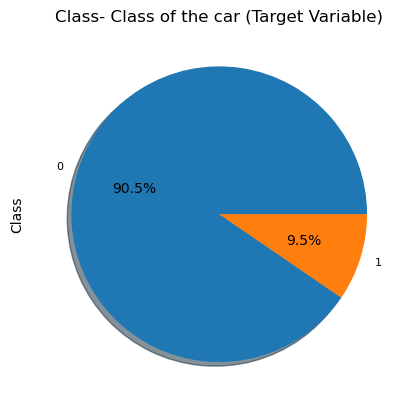

In [201]:
car_kick['Class'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title="Class- Class of the car (Target Variable)")

In [202]:
#The dataset is imbalanced

In [203]:
car_kick.isnull().sum()

PurchDate                            0
VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
WarrantyCost                         0
Auction                              0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
Nationality                          0
Size                                 0
TopThreeAmericanName     

In [204]:
#### There is no missing data

# PurchDate - Purchase Date

In [205]:
car_kick['PurchDate'] =  pd.to_datetime(car_kick['PurchDate']) 

In [206]:
def from_dob_to_age(purchase_date):
    today = datetime.date.today()
    if (purchase_date.year > today.year):
        return today.year - (purchase_date.year-100) - ((today.month, today.day) < (purchase_date.month, purchase_date.day))
    return today.year - purchase_date.year - ((today.month, today.day) < (purchase_date.month, purchase_date.day))

In [207]:
car_kick['PurchAge'] = car_kick['PurchDate'].apply(lambda x: from_dob_to_age(x))

In [208]:
car_kick.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class,PurchAge
0,1970-01-01 00:00:01.289952000,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,...,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0,53
1,1970-01-01 00:00:01.242691200,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,...,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0,53
2,1970-01-01 00:00:01.248220800,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,...,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0,53
3,1970-01-01 00:00:01.285718400,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,...,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0,53
4,1970-01-01 00:00:01.237334400,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,...,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0,53


In [209]:
#I'll drop the values beacuse they are irrelevant now
car_kick = car_kick.drop(['PurchDate'], axis=1)

In [210]:
car_kick['PurchAge'].unique()

array([53])

In [211]:
#We can drop the value, because all data if from the same year
#I'll drop the values beacuse they are irrelevant now
car_kick = car_kick.drop(['PurchAge'], axis=1)

# VehYear - Year the car was produced

In [212]:
print(type(car_kick.VehYear[0]))
print(car_kick.VehYear[0])

<class 'numpy.float64'>
2006.0


In [213]:
def distplot_mean_median(column, title = ""):
    
    mean=column.mean()
    median=column.median()
    #mode=column.mode().get_values()[0]
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(111)
    sns.boxplot(column)
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='b', linestyle='-')
    #ax_box.axvline(mode, color='b', linestyle='-')
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    #ax.set_facecolor((0,0,0.10))
    s = sns.distplot(column)
    plt.axvline(mean, color='red', linewidth=1.5, label="mean")
    plt.axvline(median, color='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


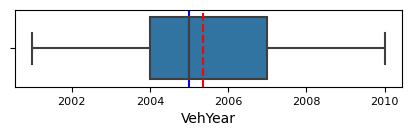

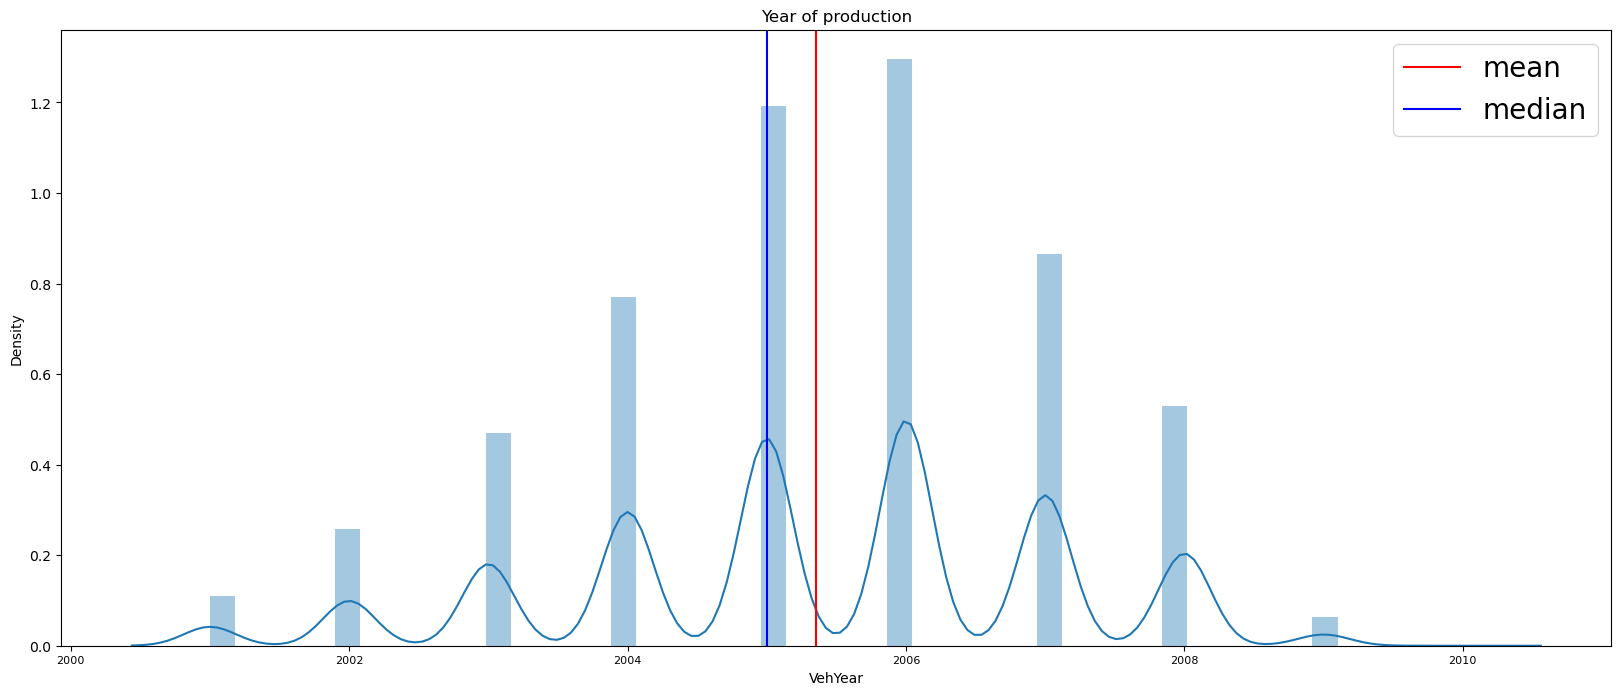

In [214]:
car_kick['VehYear'] = car_kick['VehYear'].astype(int)
distplot_mean_median(column=car_kick['VehYear'], title="Year of production")

In [215]:
#I will change the date to age of the car
car_kick['VehAge'] = car_kick['VehYear'].apply(lambda x: int(datetime.date.today().year) - x)

In [216]:
#And I will drop no longer needed cathegory
car_kick = car_kick.drop(['VehYear'], axis=1)

In [217]:
num_features.append('VehAge')

# VehicleAge - Age of the car

In [218]:
car_kick.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class,VehAge
0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,8513.0,9822.0,...,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0,17
1,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,4483.0,5666.0,...,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0,18
2,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,7917.0,9733.0,...,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0,17
3,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,11995.0,12901.0,...,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0,15
4,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,8443.0,9726.0,...,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0,16


In [219]:
#check is Vehicle age equal to new category VehAge
car_kick[['VehAge', 'VehicleAge']]

,VehAge,VehicleAge
0,17,4
1,18,4
2,17,3
3,15,2
4,16,2
...,...,...
67206,15,2
67207,19,6
67208,19,6
67209,20,7


#### these dates don't match, it's good to keep that in mind

In [220]:
num_features.append('VehicleAge')

# VehOdo - How far the car has driven in km

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


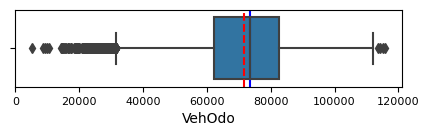

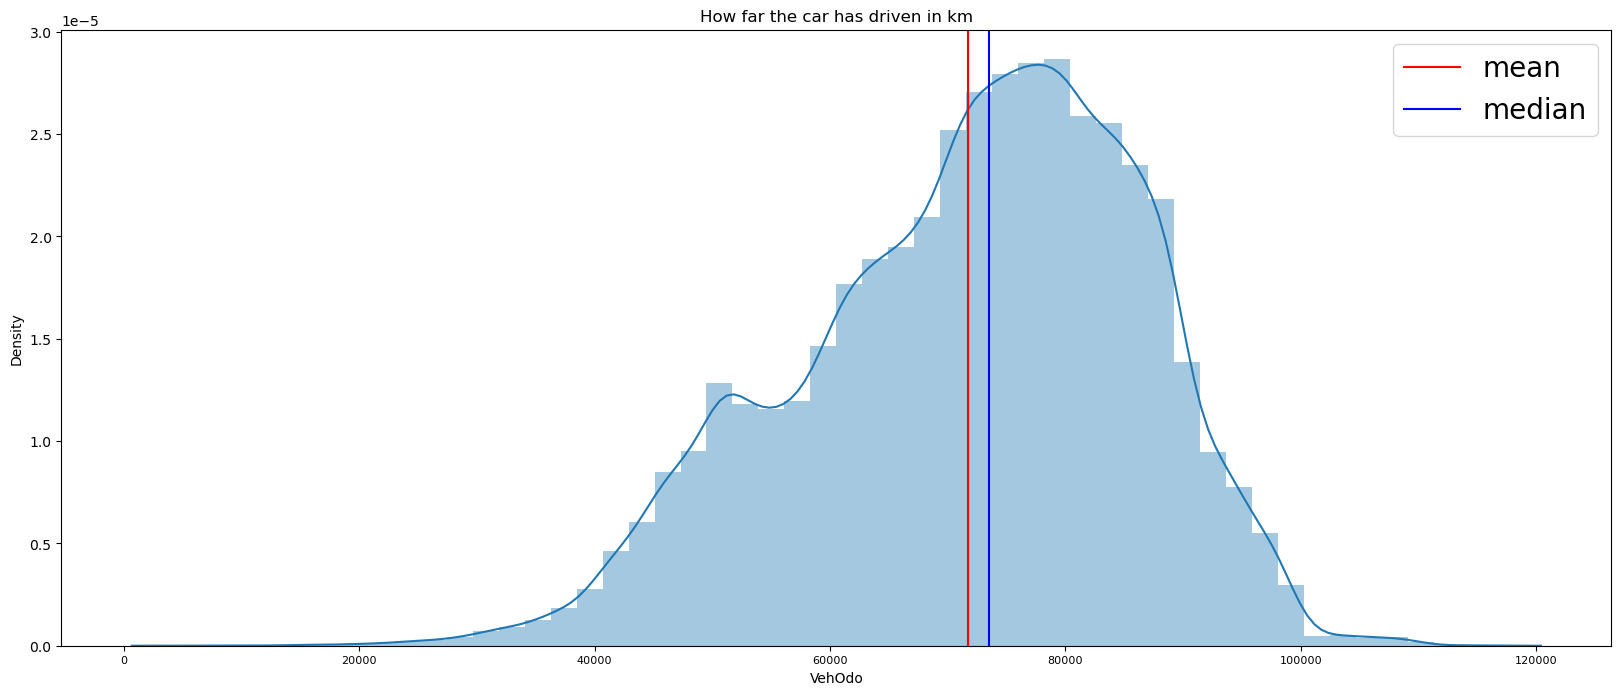

In [221]:
car_kick['VehOdo'] = car_kick['VehOdo'].astype(int)
distplot_mean_median(column=car_kick['VehOdo'], title="How far the car has driven in km")

In [222]:
num_features.append('VehOdo')

# MMRAcquisitionAuctionAveragePrice - Price of the car when is was bought at auction, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


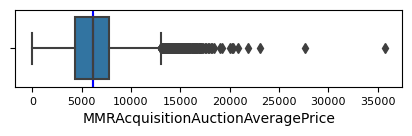

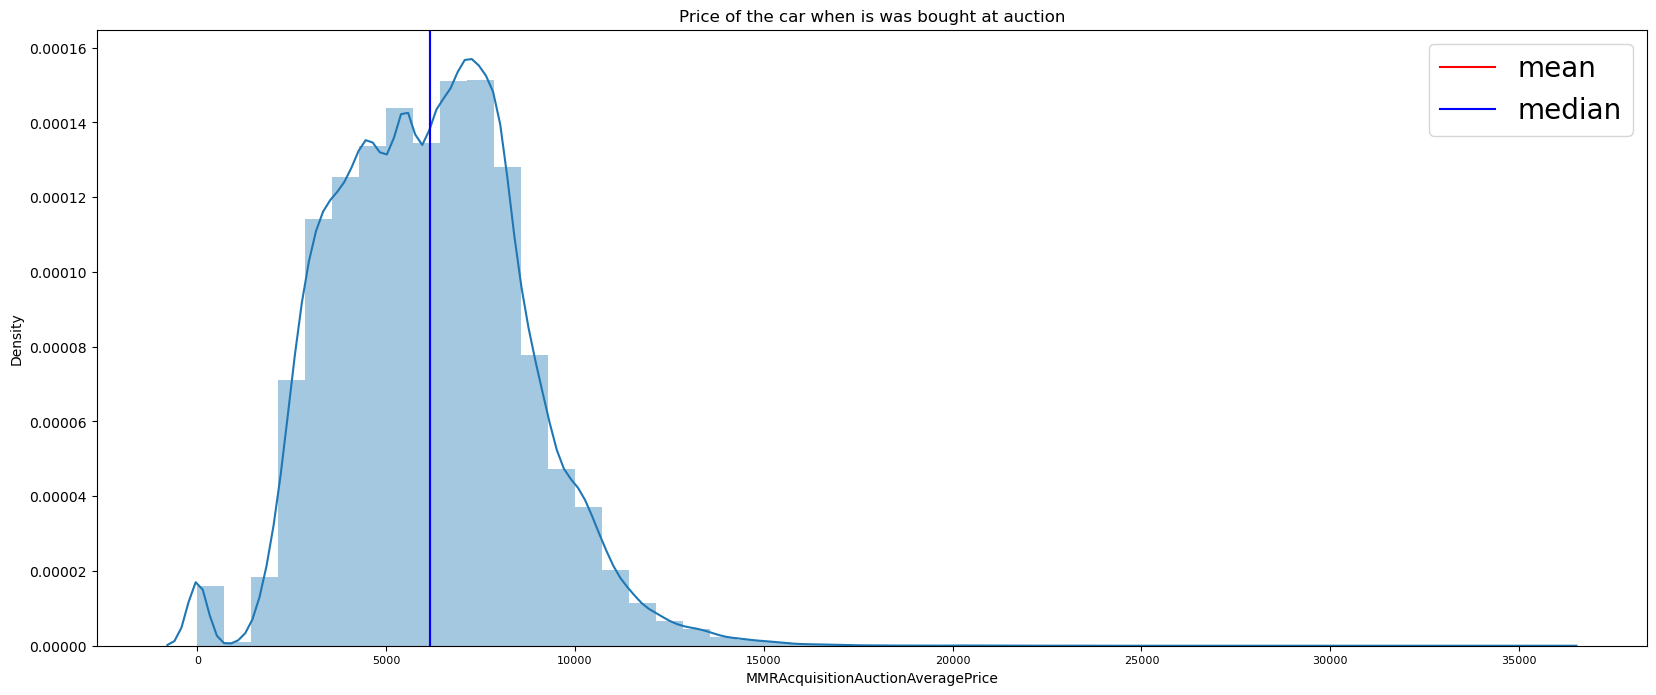

In [223]:
distplot_mean_median(column=car_kick['MMRAcquisitionAuctionAveragePrice'], title="Price of the car when is was bought at auction")

In [224]:
num_features.append('MMRAcquisitionAuctionAveragePrice')

# MMRAcquisitionAuctionCleanPrice - Price of the car when it was bought at auction, before fees

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


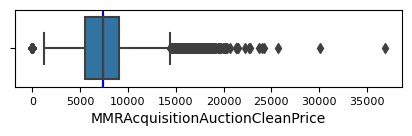

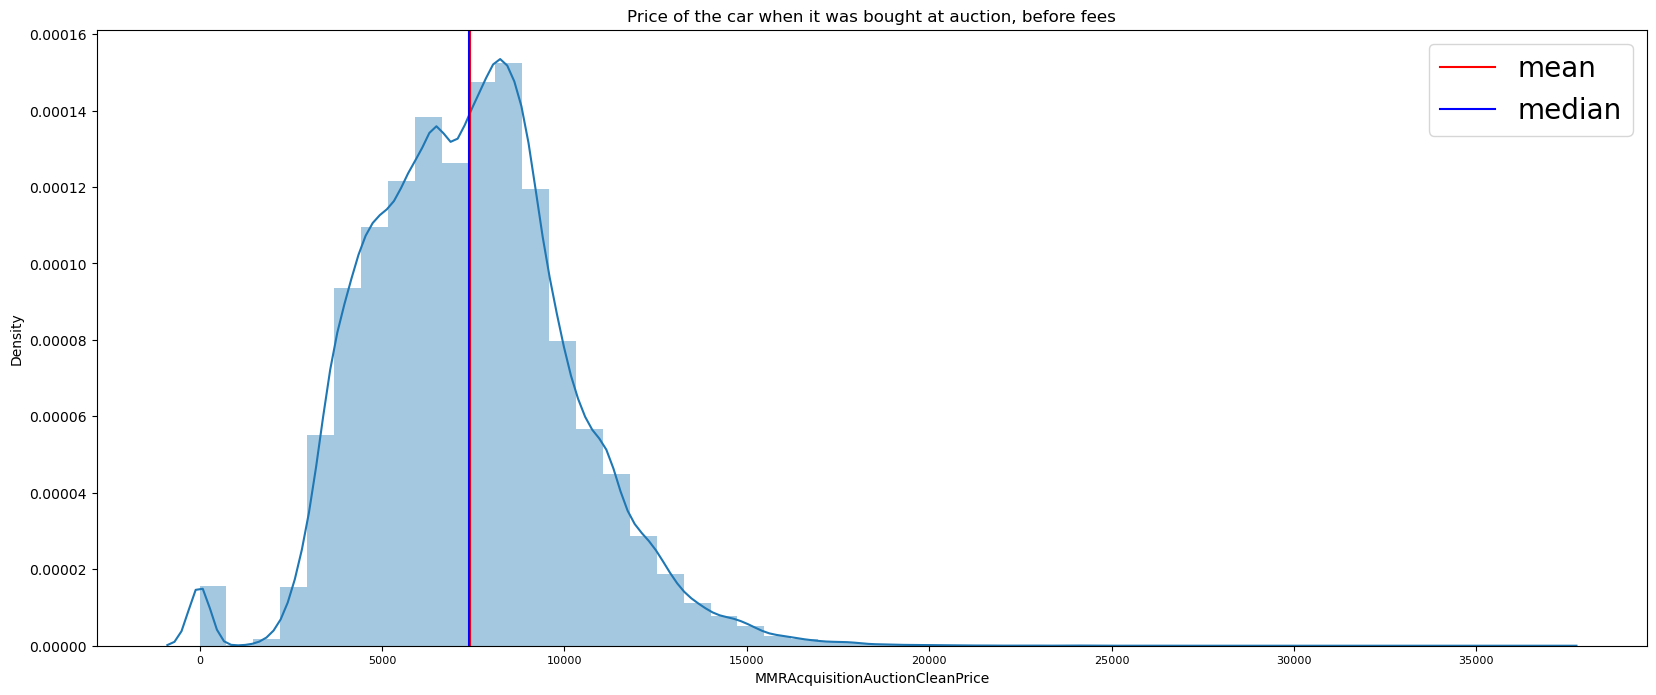

In [225]:
distplot_mean_median(column=car_kick['MMRAcquisitionAuctionCleanPrice'], title="Price of the car when it was bought at auction, before fees")

In [226]:
num_features.append('MMRAcquisitionAuctionCleanPrice')

# MMRAcquisitionRetailAveragePrice - Price of the car when is was bought in a retail store, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


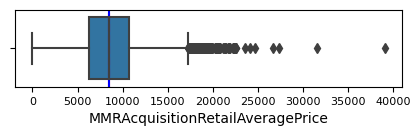

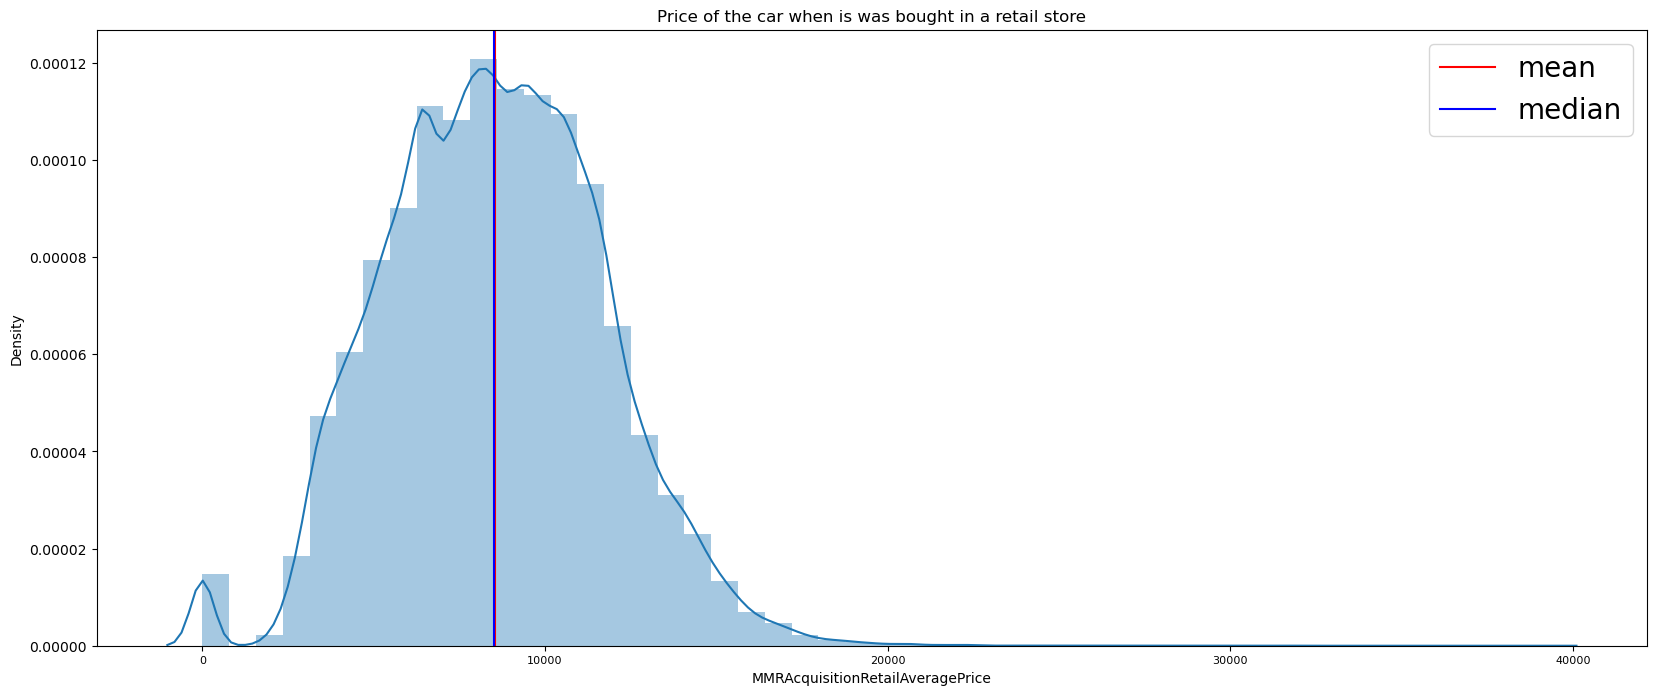

In [227]:
distplot_mean_median(column=car_kick['MMRAcquisitionRetailAveragePrice'], title="Price of the car when is was bought in a retail store")

In [228]:
num_features.append('MMRAcquisitionRetailAveragePrice')

# MMRCurrentAuctionAveragePrice - Current price of the car at auction, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


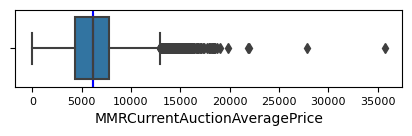

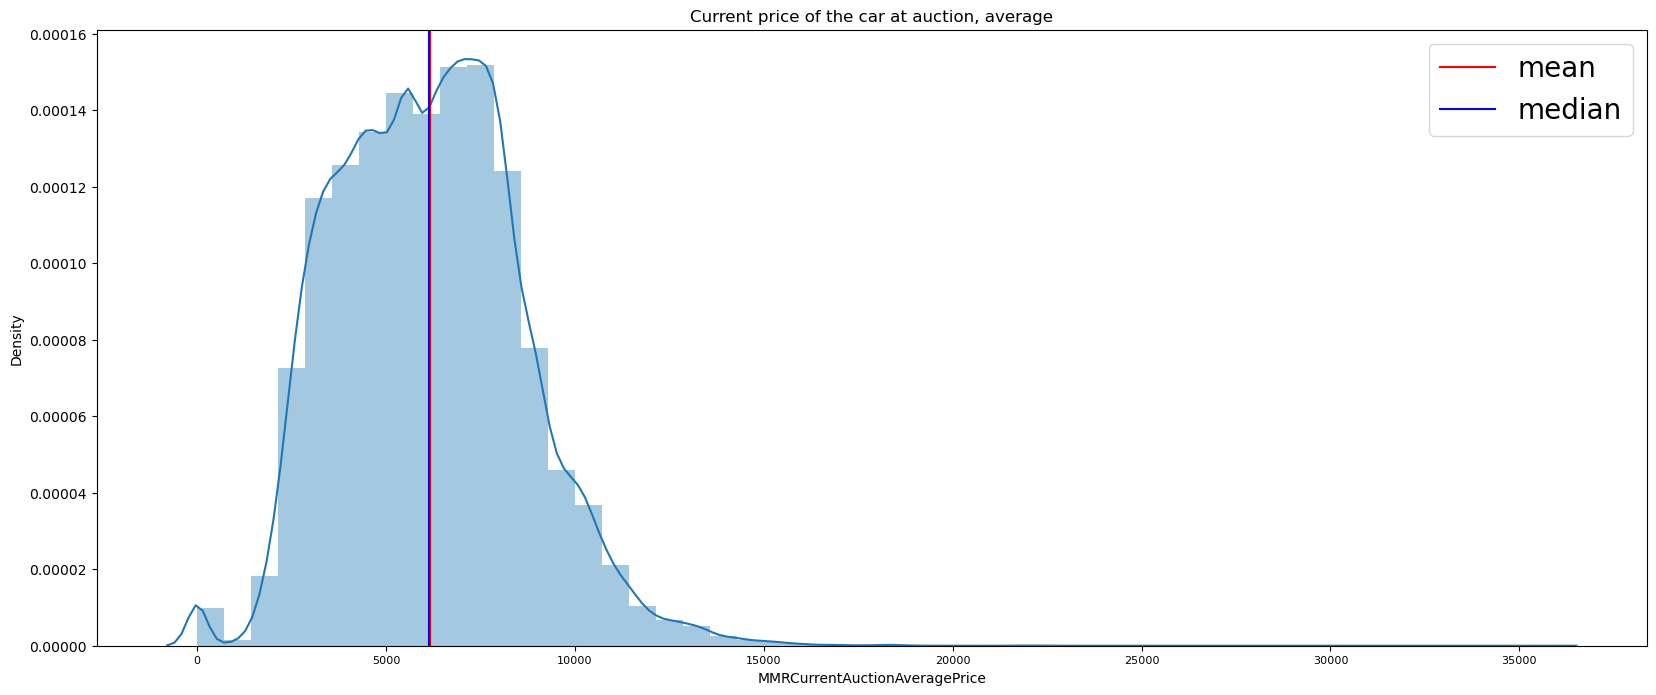

In [229]:
distplot_mean_median(column=car_kick['MMRCurrentAuctionAveragePrice'], title="Current price of the car at auction, average")

In [230]:
num_features.append('MMRCurrentAuctionAveragePrice')

# MMRCurrentRetailAveragePrice - Current price of the car at a retail store, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


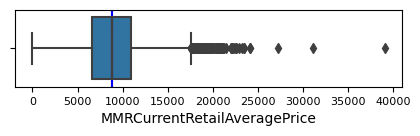

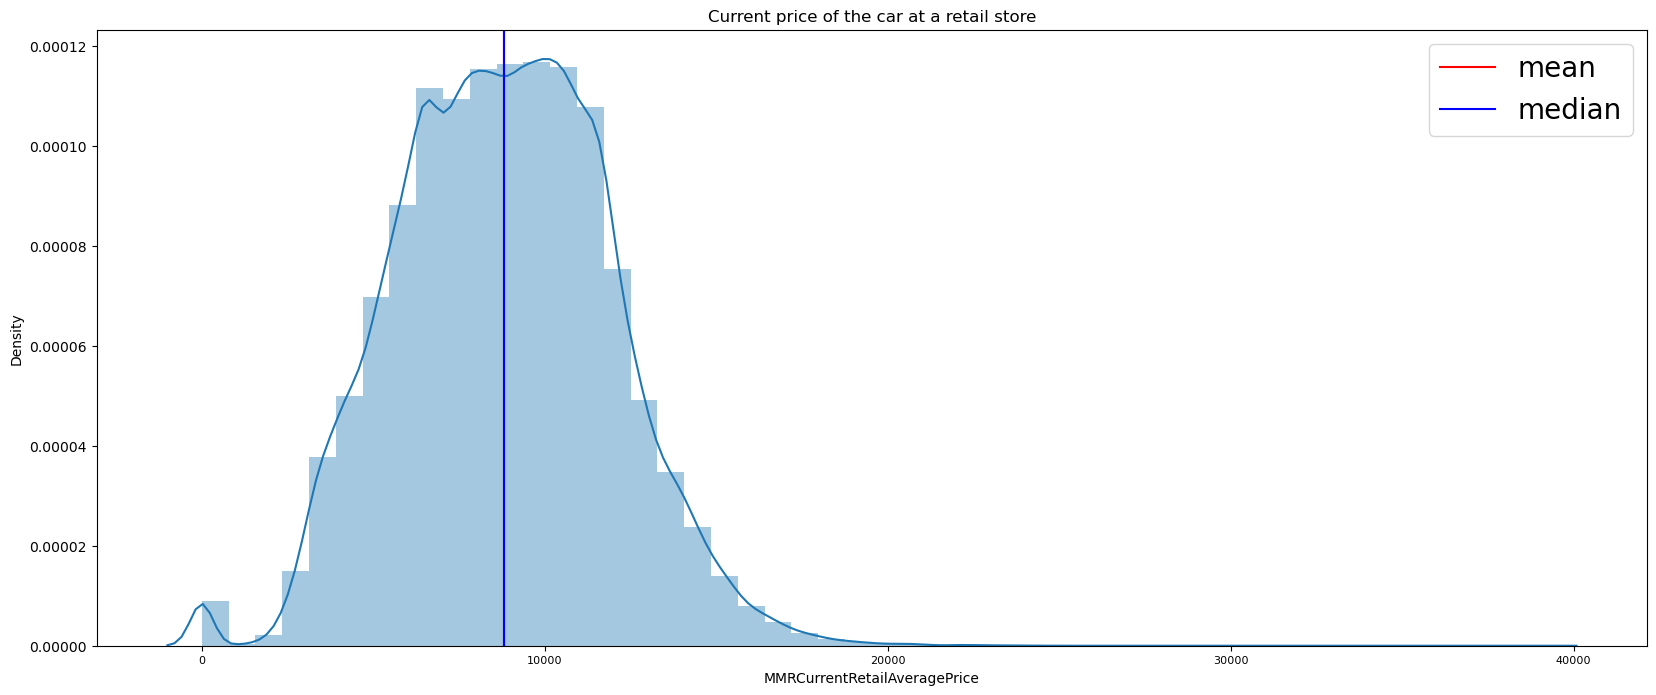

In [231]:
distplot_mean_median(column=car_kick['MMRCurrentRetailAveragePrice'], title="Current price of the car at a retail store")

In [232]:
num_features.append('MMRCurrentRetailAveragePrice')

# VehBCost - B price of the car

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


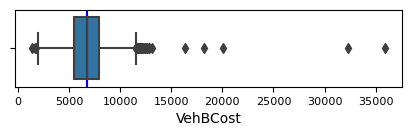

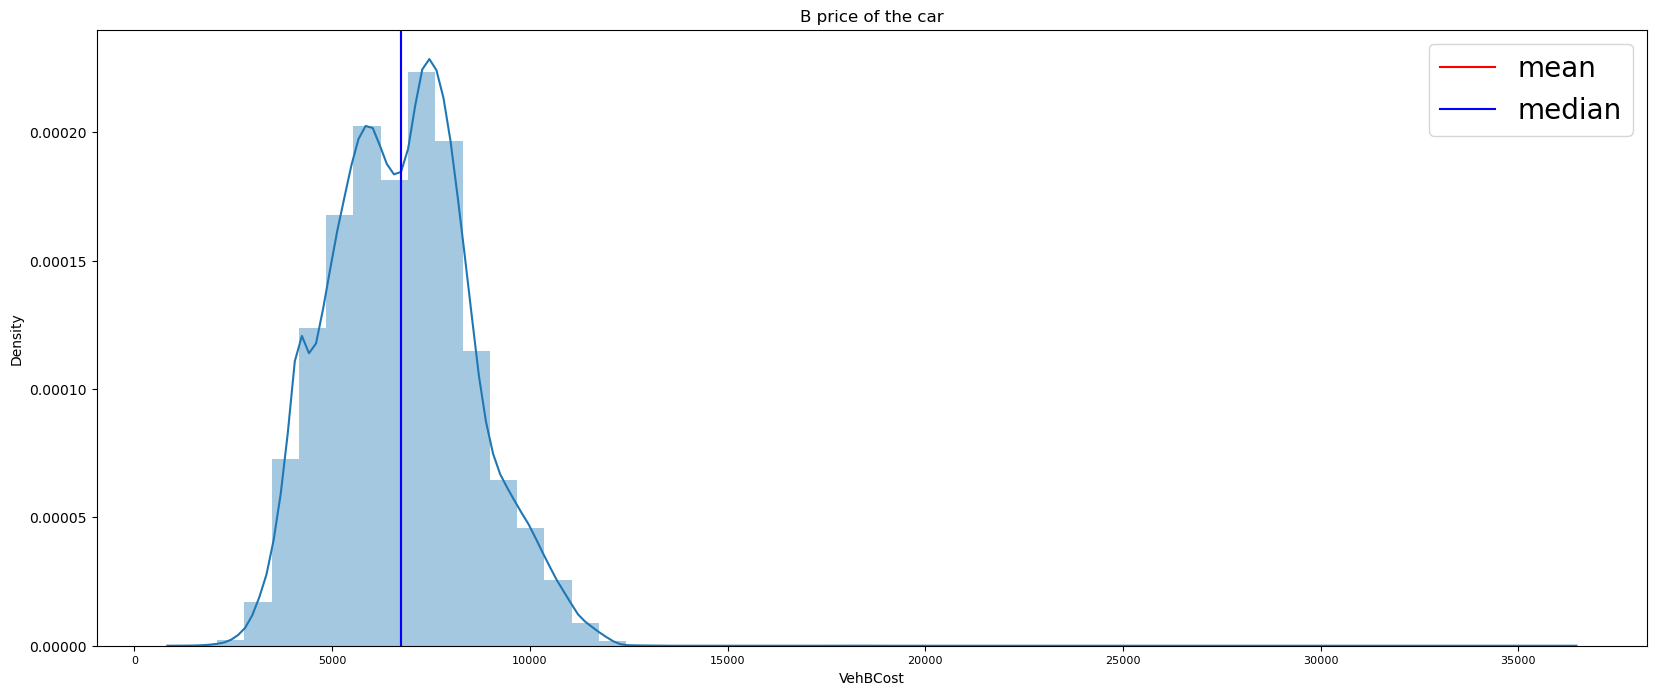

In [233]:
distplot_mean_median(column=car_kick['VehBCost'], title="B price of the car")

In [234]:
num_features.append('VehBCost')

# WarrantyCost - Cost of car warranty

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


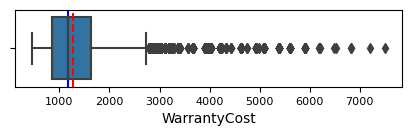

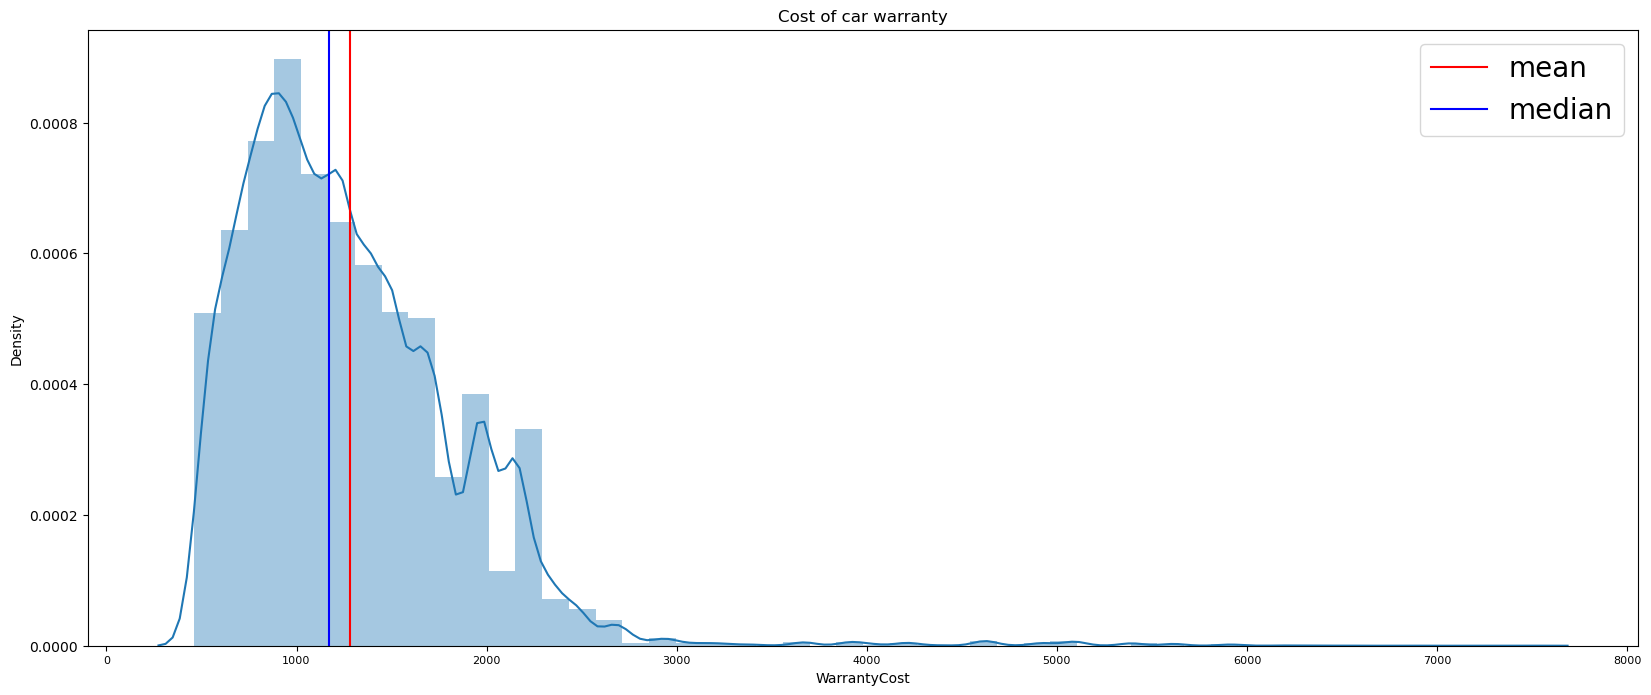

In [235]:
distplot_mean_median(column=car_kick['WarrantyCost'], title="Cost of car warranty")

In [236]:
num_features.append('WarrantyCost')

# Auction - Location of auction

In [237]:
print("Counting of unique location of auction")
print(car_kick['Auction'].value_counts())

Counting of unique location of auction
MANHEIM    38765
OTHER      15767
ADESA      12679
Name: Auction, dtype: int64


In [238]:
cat_features.append('Auction')

# Make - Producer of the car

In [239]:
print("Counting of unique producers of cars")
print(car_kick['Make'].value_counts())

Counting of unique producers of cars
CHEVROLET         16517
DODGE             12403
FORD              10687
CHRYSLER           8115
PONTIAC            3783
KIA                2284
NISSAN             1966
HYUNDAI            1707
SATURN             1679
JEEP               1554
TOYOTA             1096
MITSUBISHI          968
MAZDA               882
MERCURY             792
BUICK               676
GMC                 622
HONDA               468
SUZUKI              276
OLDSMOBILE          224
ISUZU               130
VOLKSWAGEN          118
SCION               103
VOLVO                37
LINCOLN              31
SUBARU               25
MINI                 24
ACURA                23
CADILLAC             14
INFINITI              3
PLYMOUTH              2
'TOYOTA SCION'        1
LEXUS                 1
Name: Make, dtype: int64


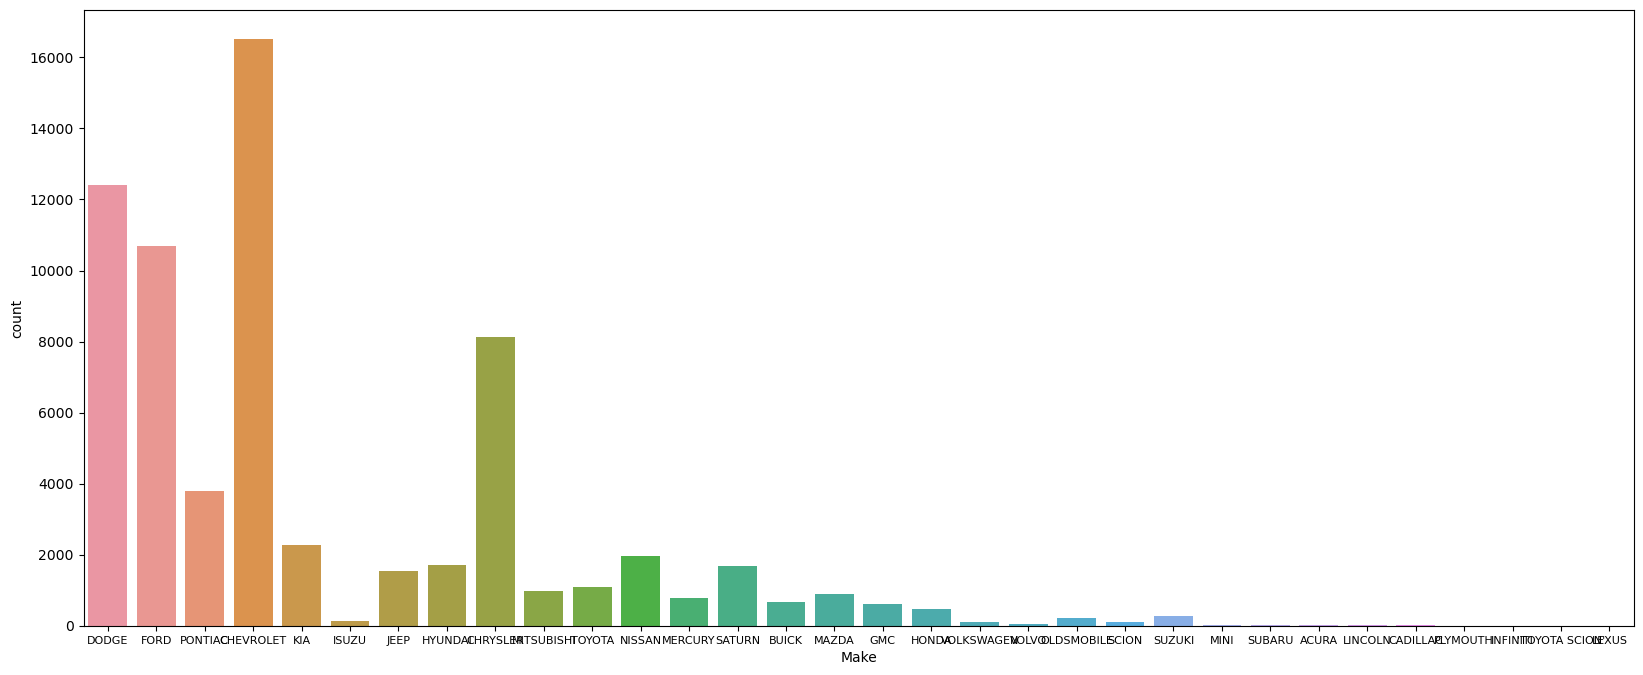

In [240]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Make", data = car_kick)
plt.show()

In [241]:
other = car_kick['Make'].value_counts()[10:].index.tolist()
car_kick['Make'].replace(other,'OTHER', inplace = True)

In [242]:
cat_features.append('Make')

# Model - Model of the car

In [243]:
print("Counting of unique models of cars")
print(car_kick['Model'].value_counts())

Counting of unique models of cars
'PT CRUISER'              2195
IMPALA                    1922
TAURUS                    1369
CALIBER                   1296
'CARAVAN GRAND FWD V6'    1233
                          ... 
'TORRENT FWD V6'             1
'350Z MFI V6 3.5L DOH'       1
'RODEO 2WD 4C MFI I-4'       1
'CONCORDE 3.2L V6 EFI'       1
'ENVOY XL 4WD V8 5.3L'       1
Name: Model, Length: 953, dtype: int64


In [244]:
#remoce quotation marks
car_kick["Model"] = car_kick["Model"].replace("""'""", "", regex=True)
# remove special character
car_kick["Model"] = car_kick["Model"].str.replace(' ', '_')

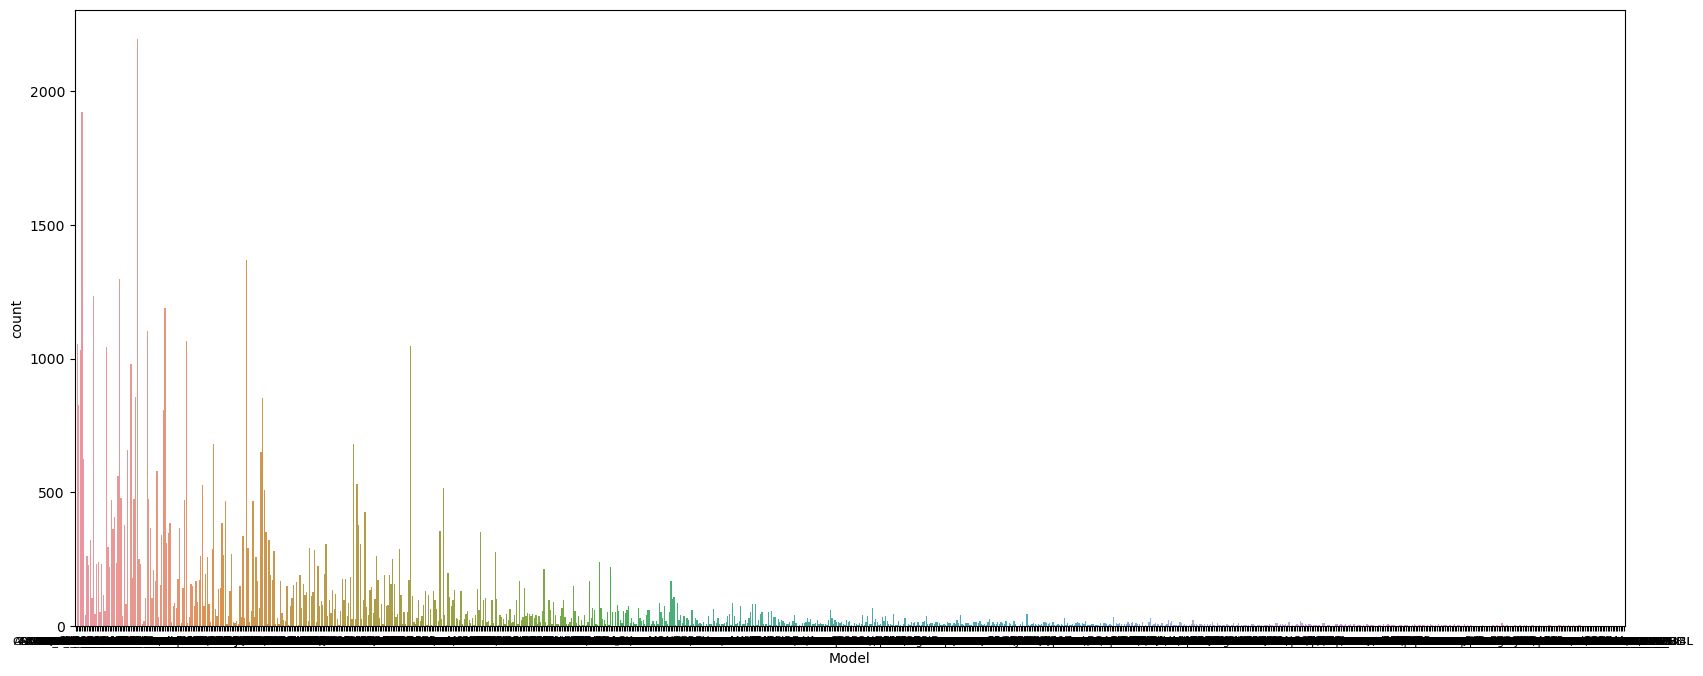

In [245]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Model", data = car_kick)
plt.show()

In [246]:
print("Counting of unique models of cars")
print(car_kick['Model'].value_counts()[:7])

Counting of unique models of cars
PT_CRUISER              2195
IMPALA                  1922
TAURUS                  1369
CALIBER                 1296
CARAVAN_GRAND_FWD_V6    1233
MALIBU_4C               1188
SEBRING_4C              1104
Name: Model, dtype: int64


In [247]:
#There is a lot of diffrent models in the data, it would be good to split it into more general categories

models1 = car_kick['Model'].value_counts()[:10].index.tolist()
models2 = car_kick['Model'].value_counts()[10:25].index.tolist()
models3 = car_kick['Model'].value_counts()[25:50].index.tolist()
models4 = car_kick['Model'].value_counts()[50:80].index.tolist()
models5 = car_kick['Model'].value_counts()[80:150].index.tolist()
models6 = car_kick['Model'].value_counts()[150:].index.tolist()

car_kick['Model'].replace(models1, "6", inplace = True)
car_kick['Model'].replace(models2, "5", inplace = True)
car_kick['Model'].replace(models3,"4", inplace = True)
car_kick['Model'].replace(models4, "3", inplace = True)
car_kick['Model'].replace(models5,"2", inplace = True)
car_kick['Model'].replace(models6,"1", inplace = True)
car_kick['Model'].value_counts()

6    13477
1    12995
5    11364
2    10639
4    10581
3     8155
Name: Model, dtype: int64

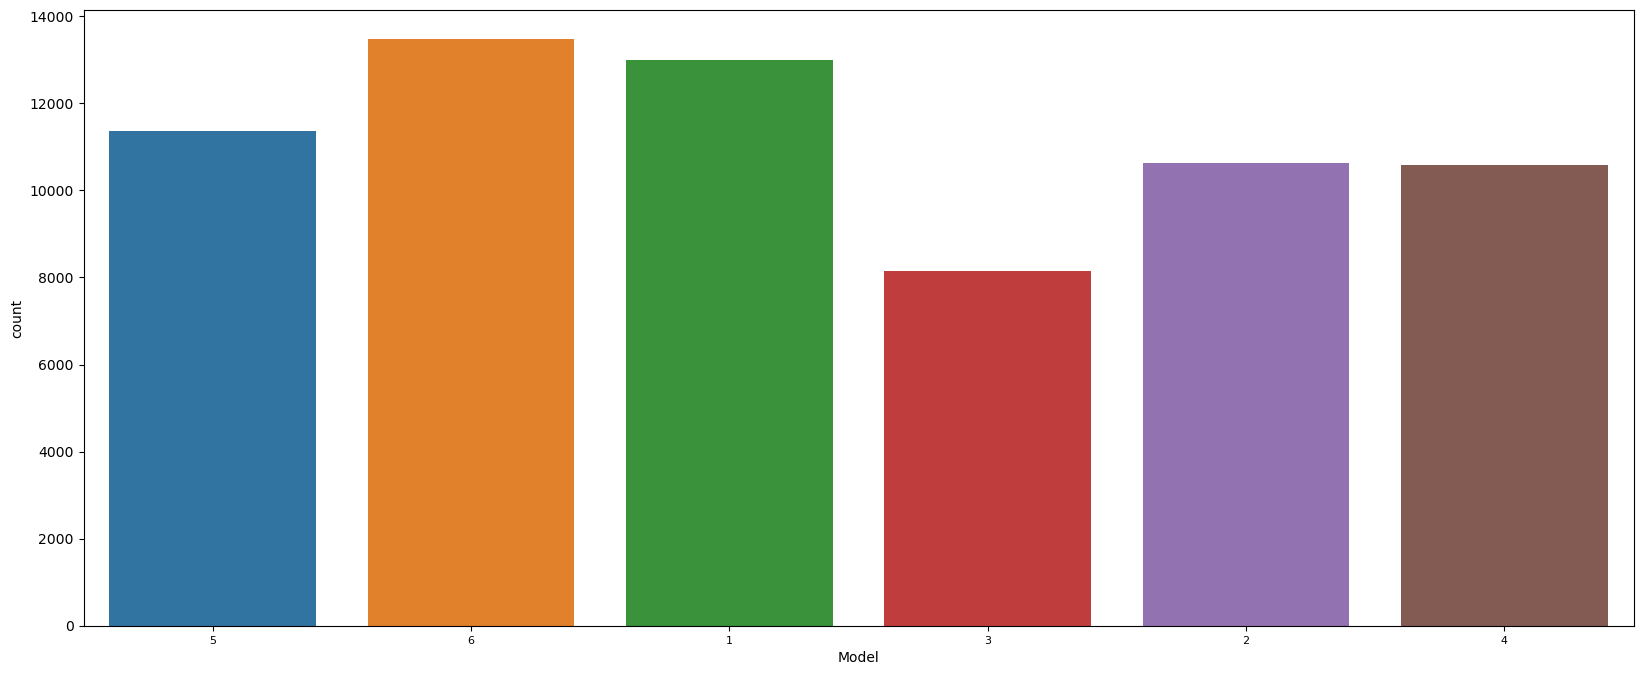

In [248]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Model", data = car_kick)
plt.show()

In [249]:
cat_features.append('Model')

# Trim - Trim level of the car

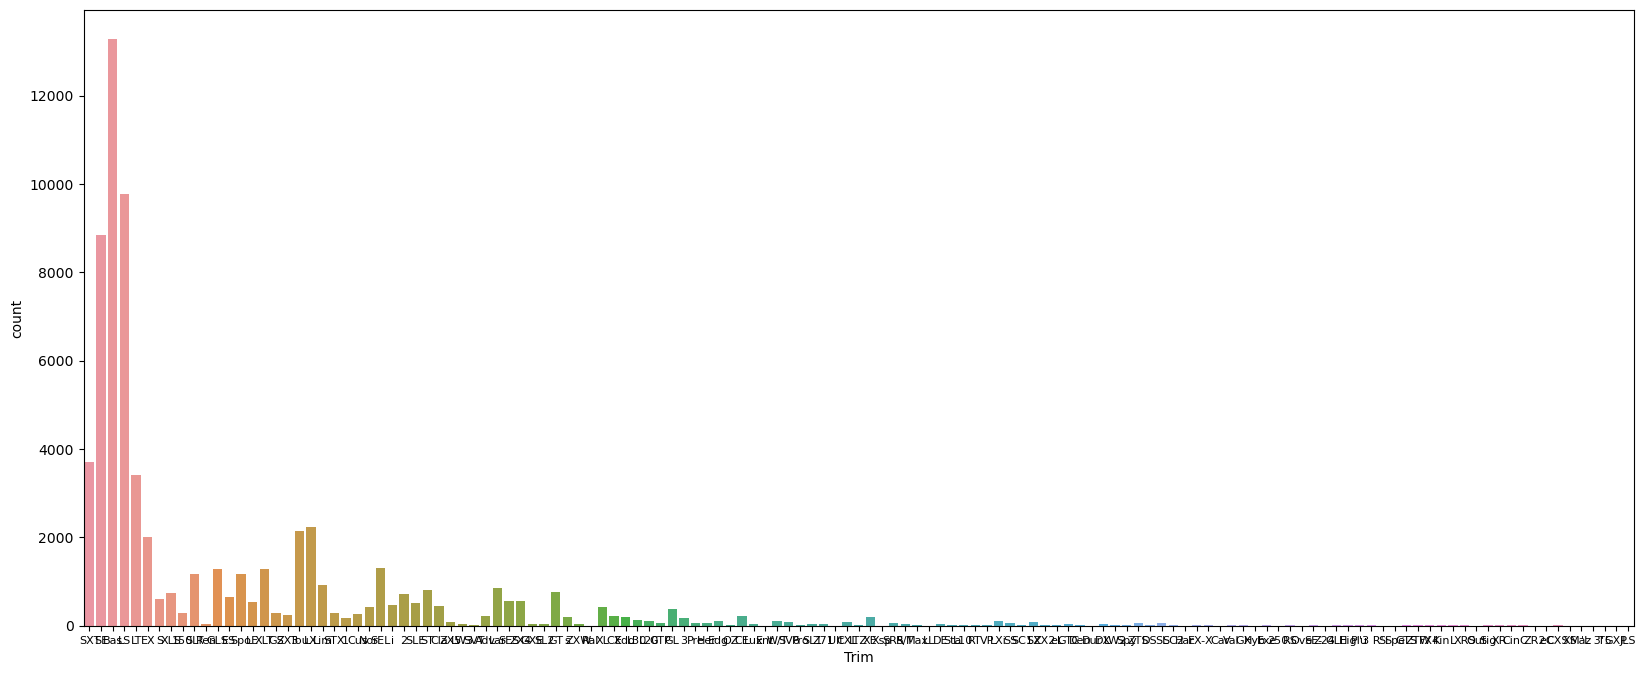

In [250]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Trim", data = car_kick)
plt.show()

In [251]:
print("Counting of unique levels of cars")
print(car_kick['Trim'].value_counts()[80:100])

Counting of unique levels of cars
L10      18
GLE      16
SC1      15
Max      15
X        14
OZ       13
ZX2      12
Pro      12
FX4      11
Kin      10
Sig      10
SVT       9
eL        8
CXS       8
GTS       7
'3 R'     7
Hig       7
L         7
RT        7
XRS       7
Name: Trim, dtype: int64


In [252]:
#There is a lot of diffrent models in the data, it would be good to split it into more general categories

lvl1 = car_kick['Trim'].value_counts()[:3].index.tolist()
lvl2 = car_kick['Trim'].value_counts()[3:10].index.tolist()
lvl3 = car_kick['Trim'].value_counts()[10:25].index.tolist()
lvl4 = car_kick['Trim'].value_counts()[25:50].index.tolist()
lvl5 = car_kick['Trim'].value_counts()[50:].index.tolist()

car_kick['Trim'].replace(lvl1, "5", inplace = True)
car_kick['Trim'].replace(lvl2, "4", inplace = True)
car_kick['Trim'].replace(lvl3,"3", inplace = True)
car_kick['Trim'].replace(lvl4, "2", inplace = True)
car_kick['Trim'].replace(lvl5,"1", inplace = True)
car_kick['Trim'].value_counts()

5    31891
2    17706
4    16092
1     1522
Name: Trim, dtype: int64

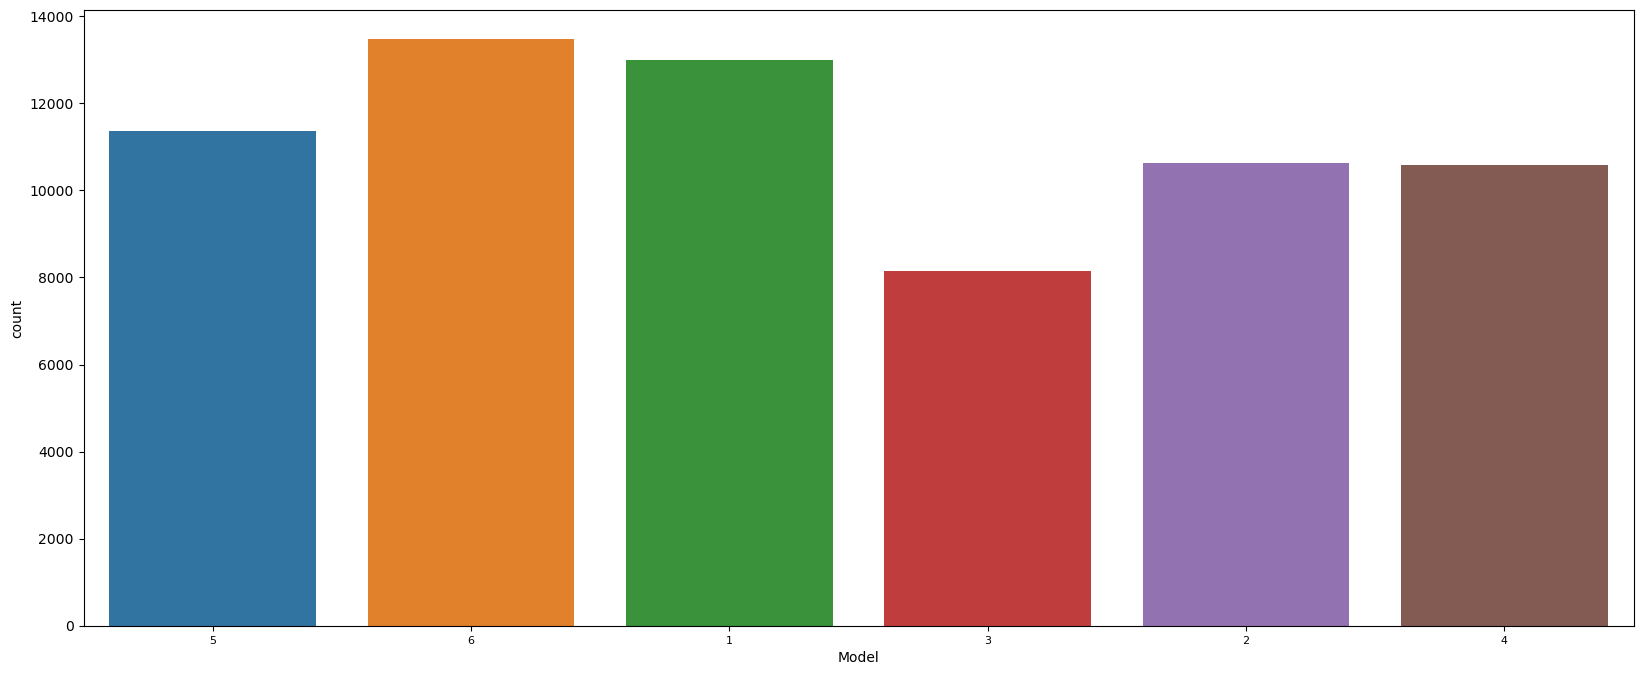

In [253]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Model", data = car_kick)
plt.show()

In [254]:
cat_features.append('Trim')

# SubModel - Submodel of the car

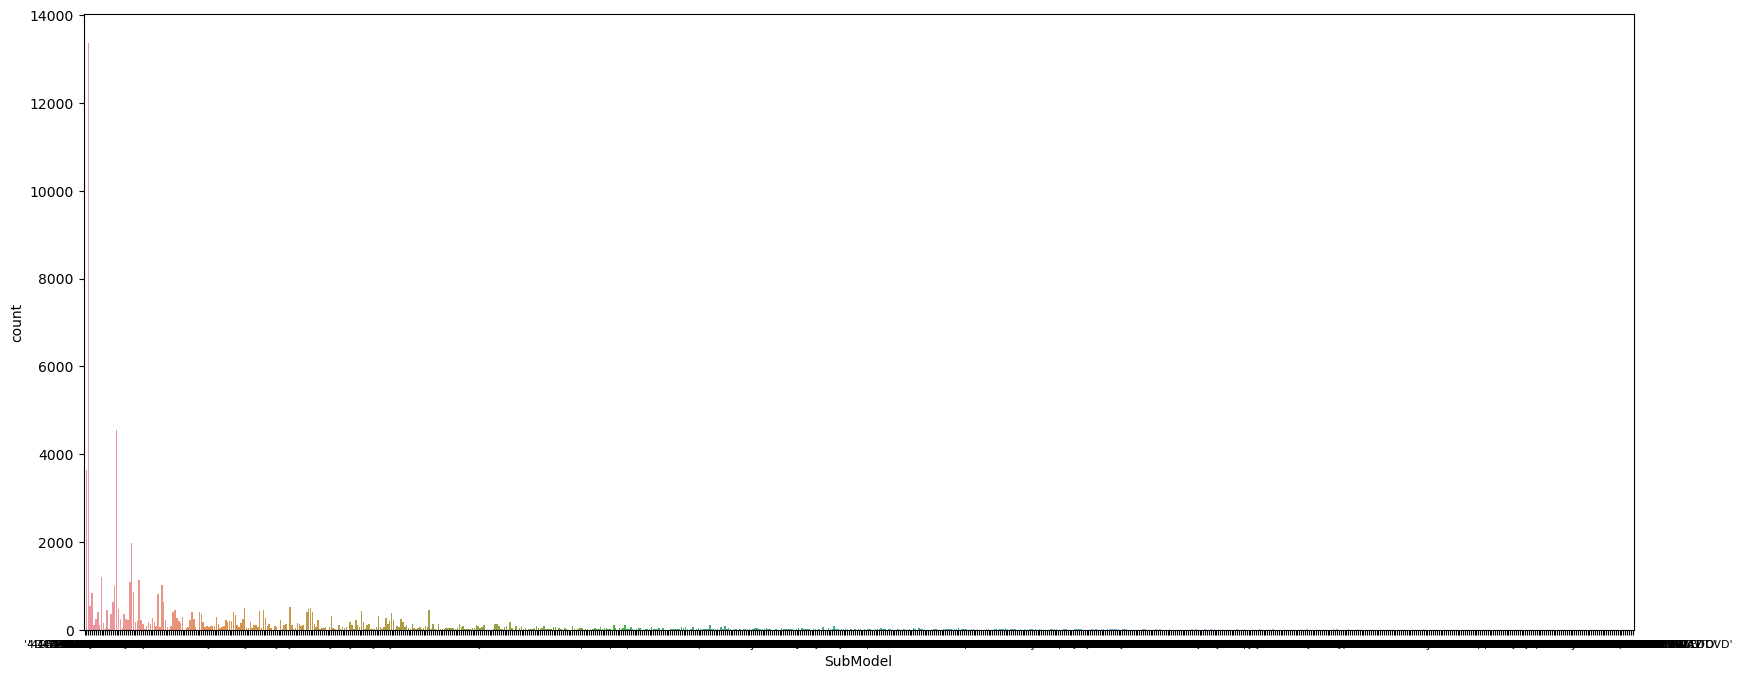

In [255]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "SubModel", data = car_kick)
plt.show()

In [256]:
print("Counting of unique submodels of cars")
print(car_kick['SubModel'].value_counts()[:10])

Counting of unique submodels of cars
'4D SEDAN'            13363
'4D SEDAN LS'          4541
'4D SEDAN SE'          3648
'4D WAGON'             1979
'MINIVAN 3.3L'         1203
'4D SUV 4.2L LS'       1137
'4D SEDAN LT'          1094
'4D SEDAN SXT FFV'     1090
'4D SEDAN LX'          1022
'2D COUPE'              997
Name: SubModel, dtype: int64


In [257]:
#remoce quotation marks
car_kick["SubModel"] = car_kick["SubModel"].replace("""'""", "", regex=True)
# remove special character
car_kick["SubModel"] = car_kick["SubModel"].str.replace(' ', '_')

In [258]:
#There is a lot of diffrent models in the data, it would be good to split it into more general categories

models0 = car_kick['SubModel'].value_counts()[1:5].index.tolist()
models1 = car_kick['SubModel'].value_counts()[5:10].index.tolist()
models2 = car_kick['SubModel'].value_counts()[10:25].index.tolist()
models3 = car_kick['SubModel'].value_counts()[25:50].index.tolist()
models4 = car_kick['SubModel'].value_counts()[50:80].index.tolist()
models5 = car_kick['SubModel'].value_counts()[80:150].index.tolist()
models6 = car_kick['SubModel'].value_counts()[150:].index.tolist()

car_kick['SubModel'].replace(models0, "7", inplace = True)
car_kick['SubModel'].replace(models1, "6", inplace = True)
car_kick['SubModel'].replace(models2, "5", inplace = True)
car_kick["SubModel"].replace(models3,"4", inplace = True)
car_kick['SubModel'].replace(models4, "3", inplace = True)
car_kick['SubModel'].replace(models5,"2", inplace = True)
car_kick['SubModel'].replace(models6,"1", inplace = True)
car_kick['SubModel'].value_counts()

4D_SEDAN    13363
7           11371
5            8557
4            8472
1            7361
2            6832
3            5915
6            5340
Name: SubModel, dtype: int64

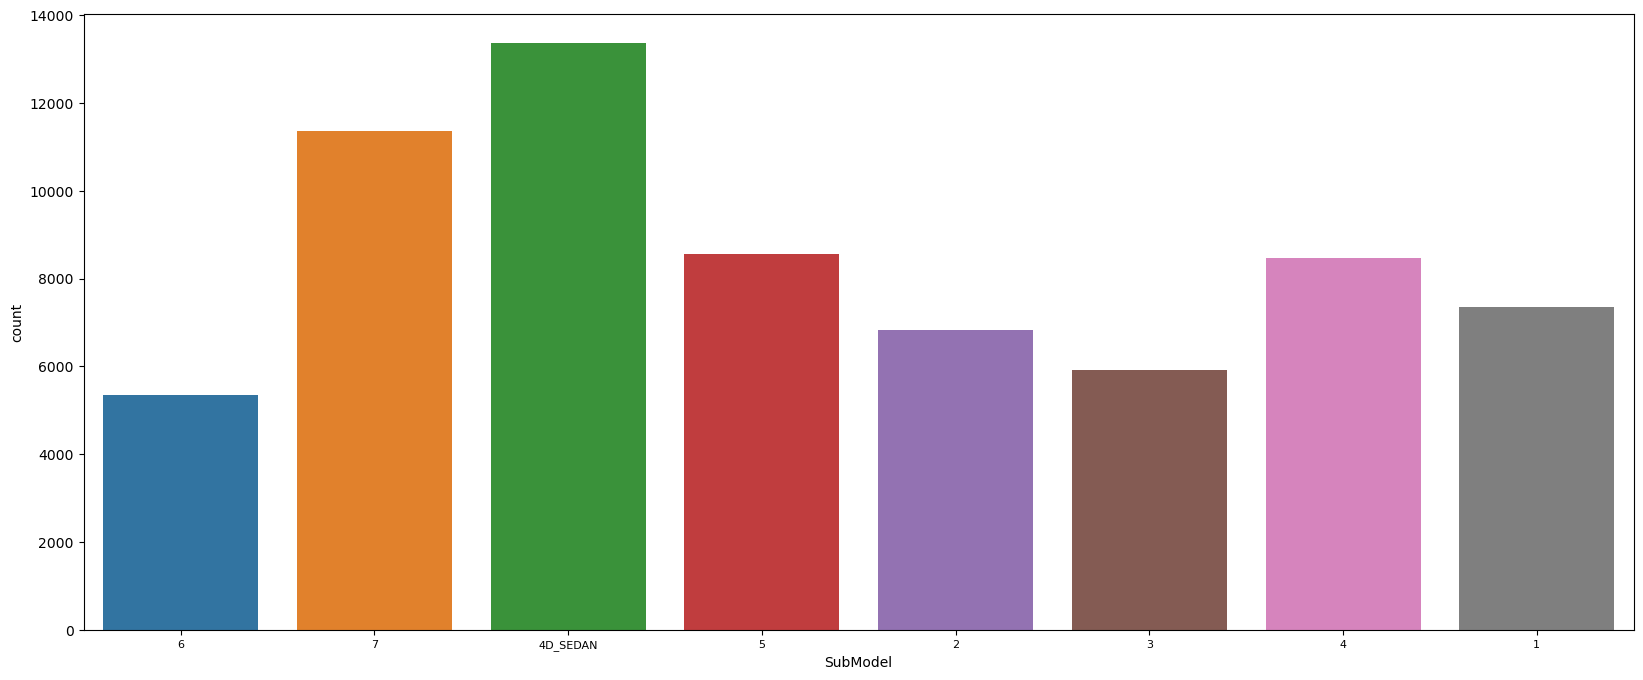

In [259]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "SubModel", data = car_kick)
plt.show()

In [260]:
cat_features.append('SubModel')

# Color - Color of the car

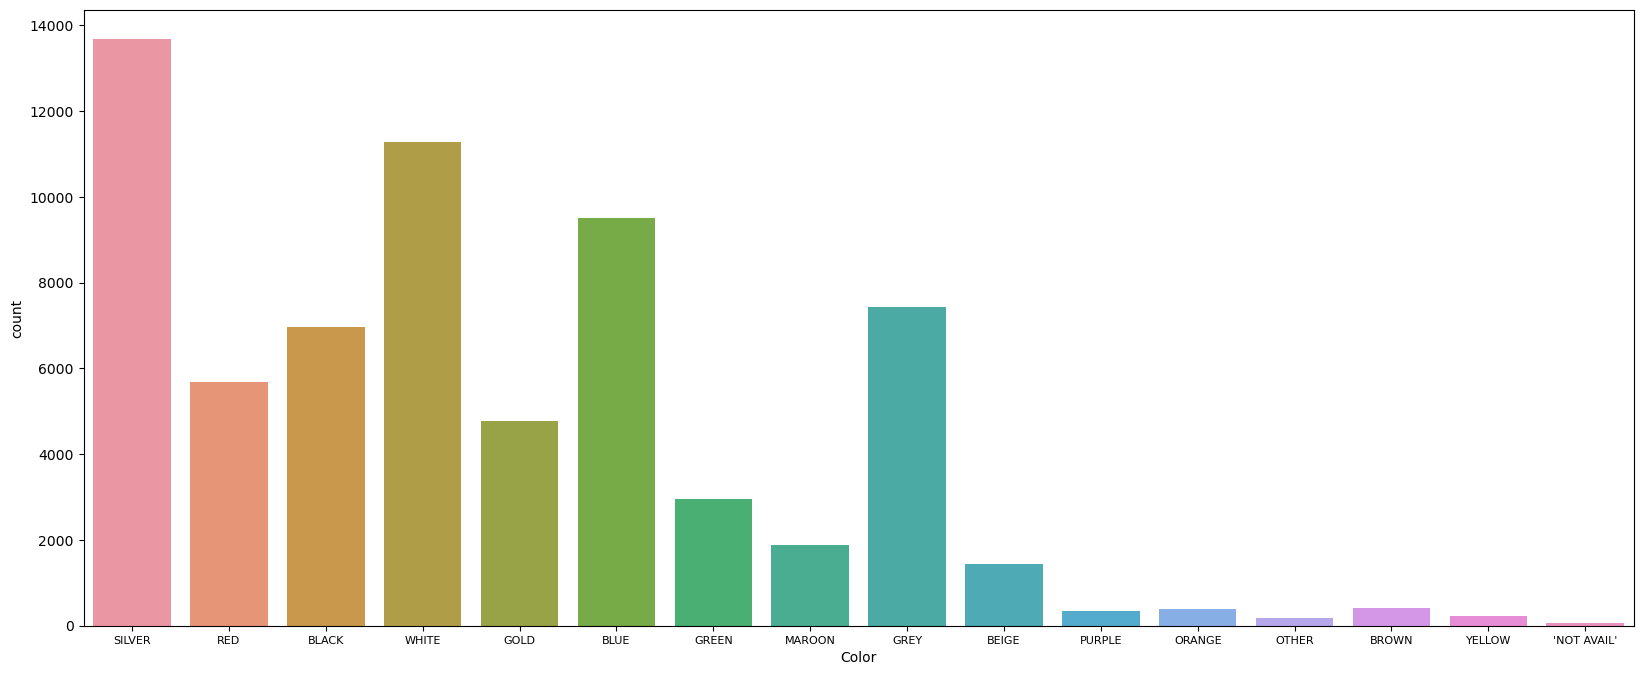

In [261]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Color", data = car_kick)
plt.show()

In [262]:
print("Counting of unique color of cars")
print(car_kick['Color'].value_counts())

Counting of unique color of cars
SILVER         13683
WHITE          11285
BLUE            9515
GREY            7422
BLACK           6965
RED             5678
GOLD            4767
GREEN           2961
MAROON          1888
BEIGE           1435
BROWN            416
ORANGE           381
PURPLE           347
YELLOW           233
OTHER            175
'NOT AVAIL'       60
Name: Color, dtype: int64


In [263]:
other = car_kick['Color'].value_counts()[10:].index.tolist()
car_kick['Color'].replace(other, "OTHER", inplace = True)

In [264]:
cat_features.append('Color')

# Transmission - Type of transmission in the car

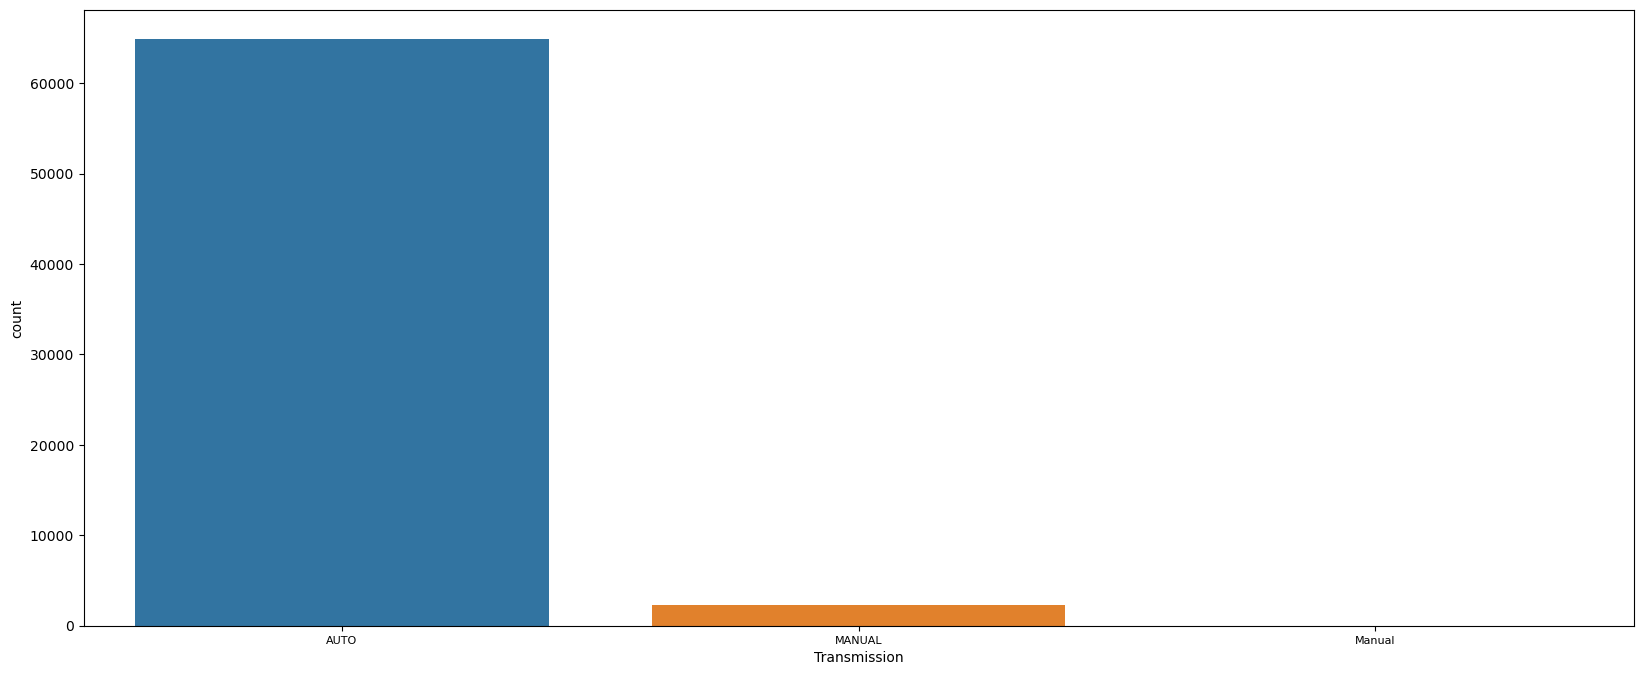

In [265]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Transmission", data = car_kick)
plt.show()

In [266]:
car_kick['Transmission'].replace("Manual", "MANUAL", inplace = True)

In [267]:
cat_features.append('Transmission')

# WheelTypeID - ID of the wheelID

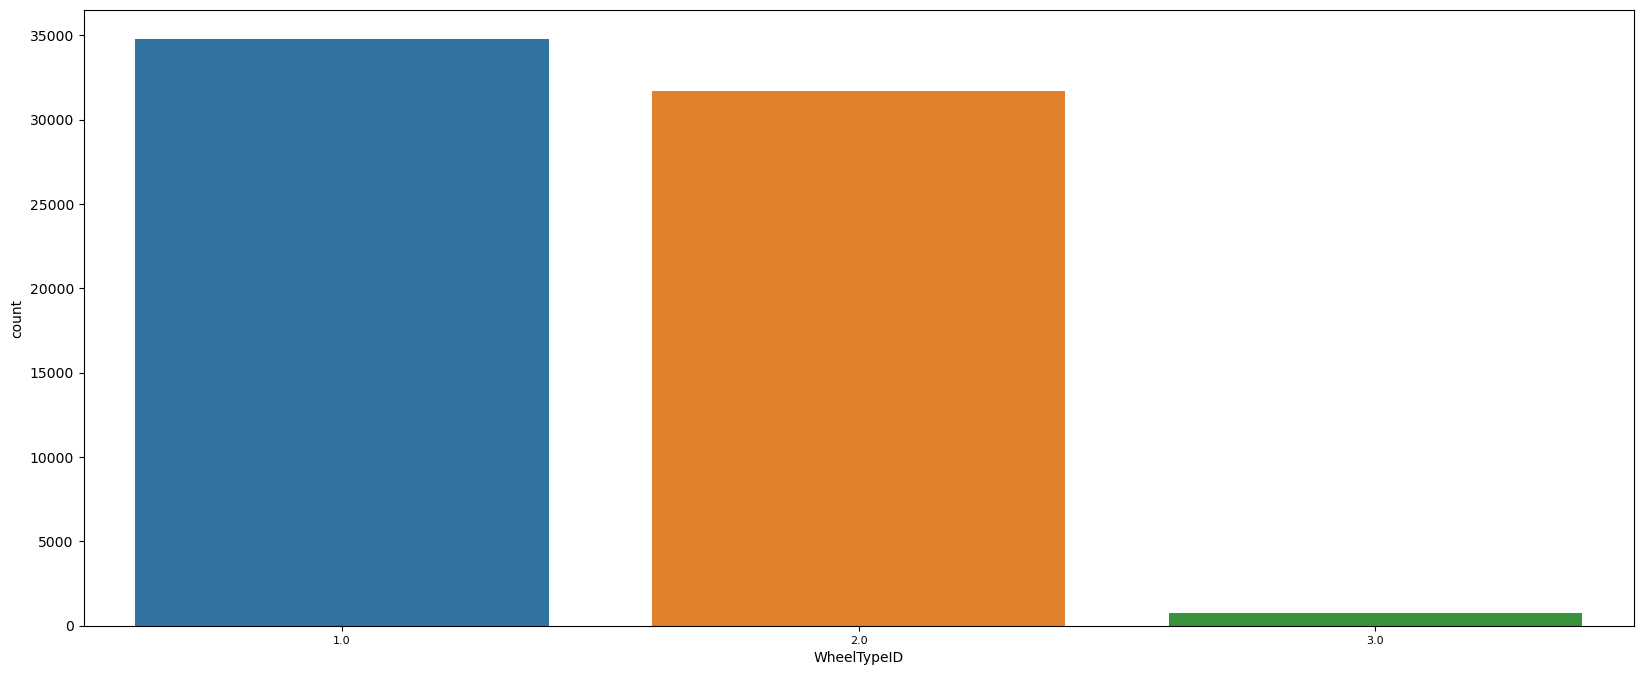

In [268]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "WheelTypeID", data = car_kick)
plt.show()

In [269]:
#change to int
car_kick['WheelTypeID'] = car_kick['WheelTypeID'].astype(int)

In [270]:
cat_features.append('WheelTypeID')

# WheelType - Type of wheel

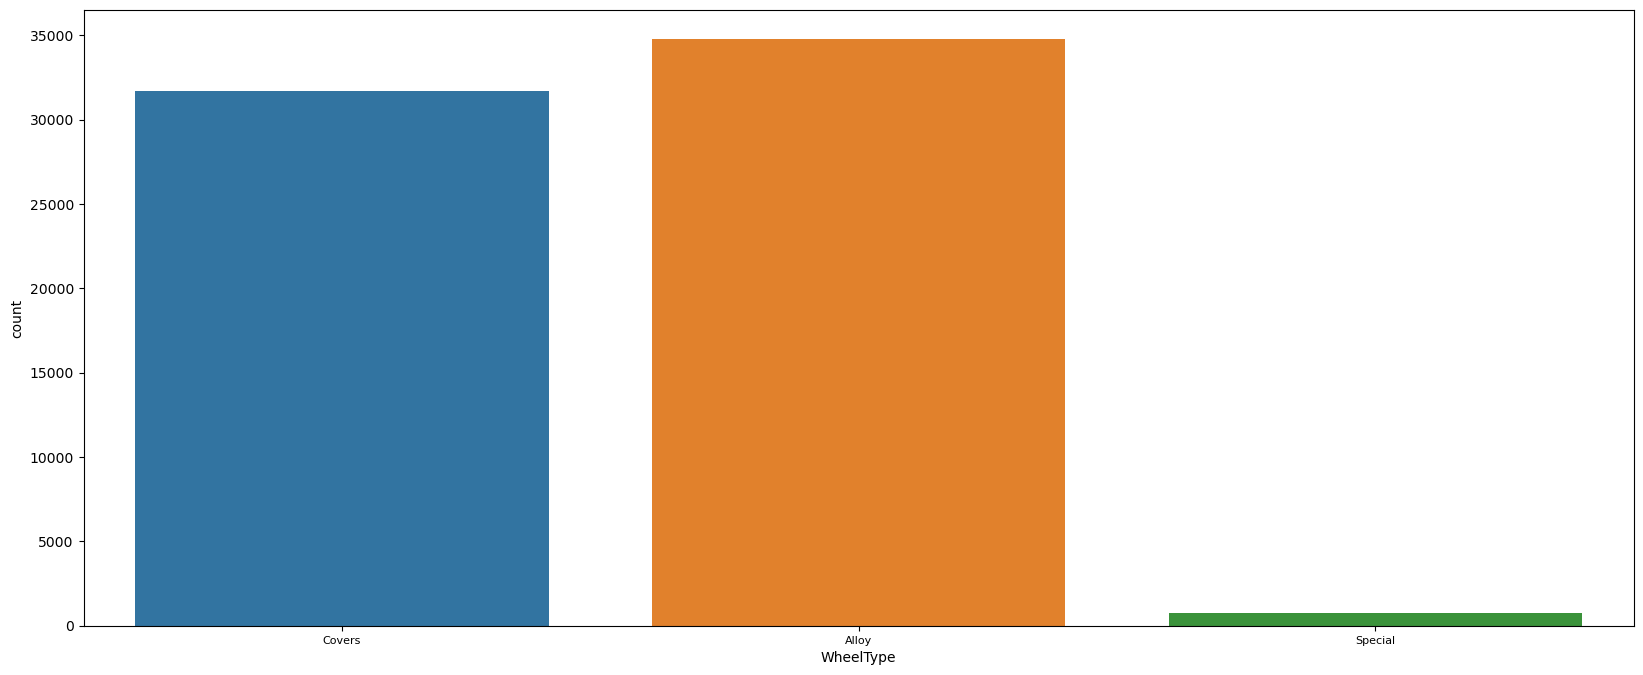

In [271]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "WheelType", data = car_kick)
plt.show()

In [272]:
cat_features.append('WheelType')

# Nationality - Nationality of the car

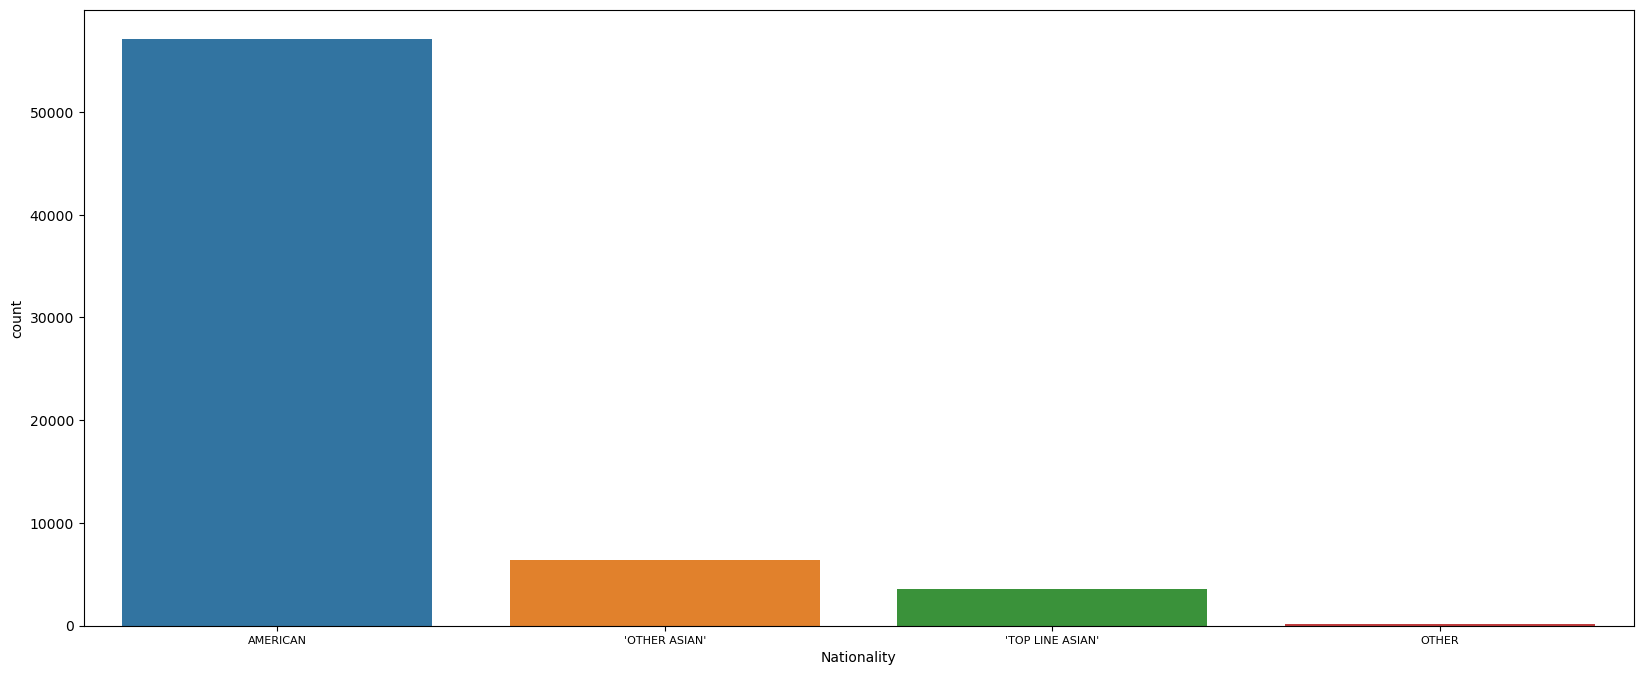

In [273]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Nationality", data = car_kick)
plt.show()

In [274]:
other = car_kick['Nationality'].value_counts()[1:].index.tolist()
car_kick['Nationality'].replace(other, "OTHER", inplace = True)

In [275]:
cat_features.append('Nationality')

# Size - Size of the car

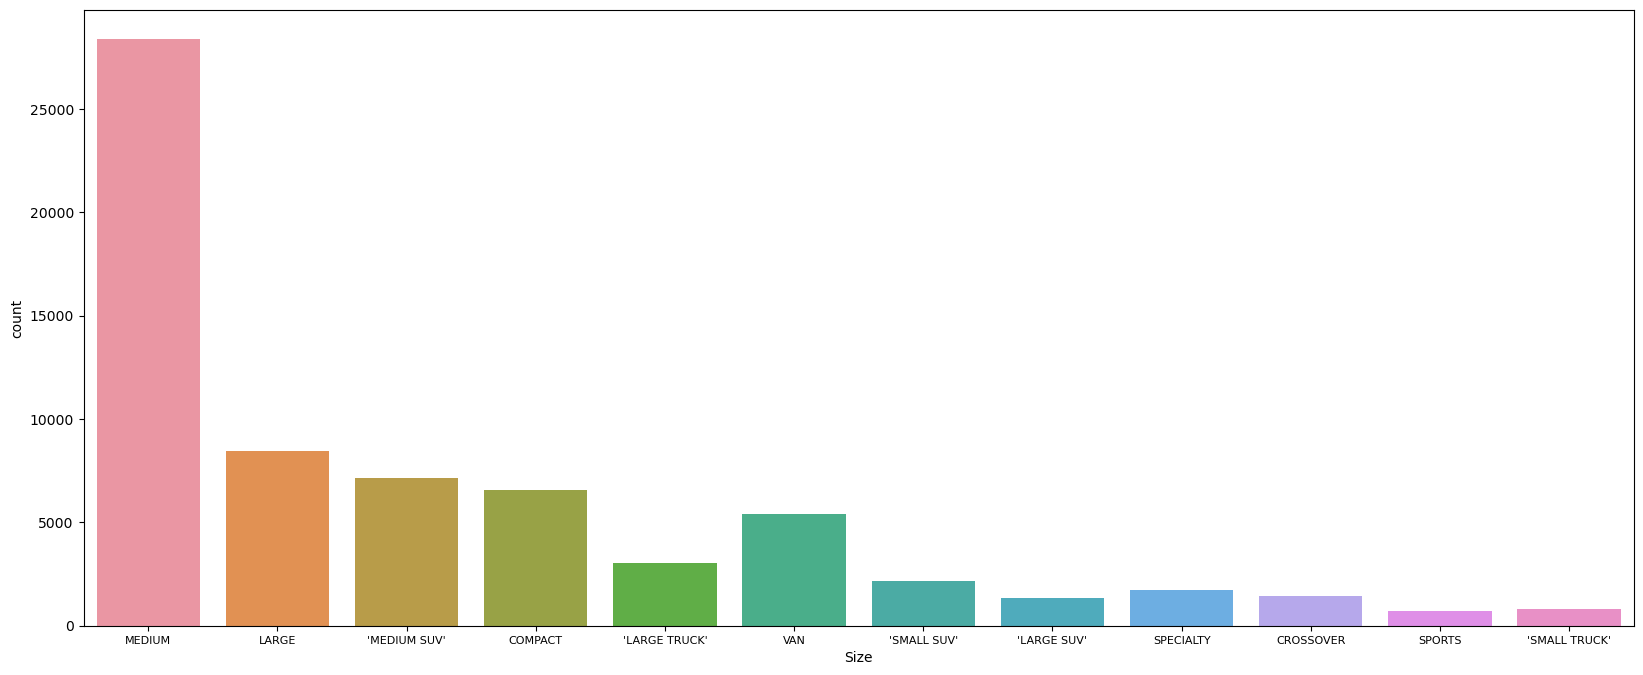

In [276]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Size", data = car_kick)
plt.show()

In [277]:
#remoce quotation marks
car_kick["Size"] = car_kick["Size"].replace("""'""", "", regex=True)
# remove special character
car_kick["Size"] = car_kick["Size"].str.replace(' ', '_')

In [278]:
car_kick['Size'].replace(["LARGE", "LARGE_TRUCK", "LARGE_SUV"], "LARGE", inplace = True)
car_kick['Size'].replace(["SMALL_SUV", "SMALL_TRUCK", "SPORTS"], "SMALL", inplace = True)
car_kick['Size'].replace(["SPECIALTY", "CROSSOVER"], "OTHER", inplace = True)

car_kick['Size'].value_counts()

MEDIUM        28375
LARGE         12830
MEDIUM_SUV     7149
COMPACT        6546
VAN            5422
SMALL          3709
OTHER          3180
Name: Size, dtype: int64

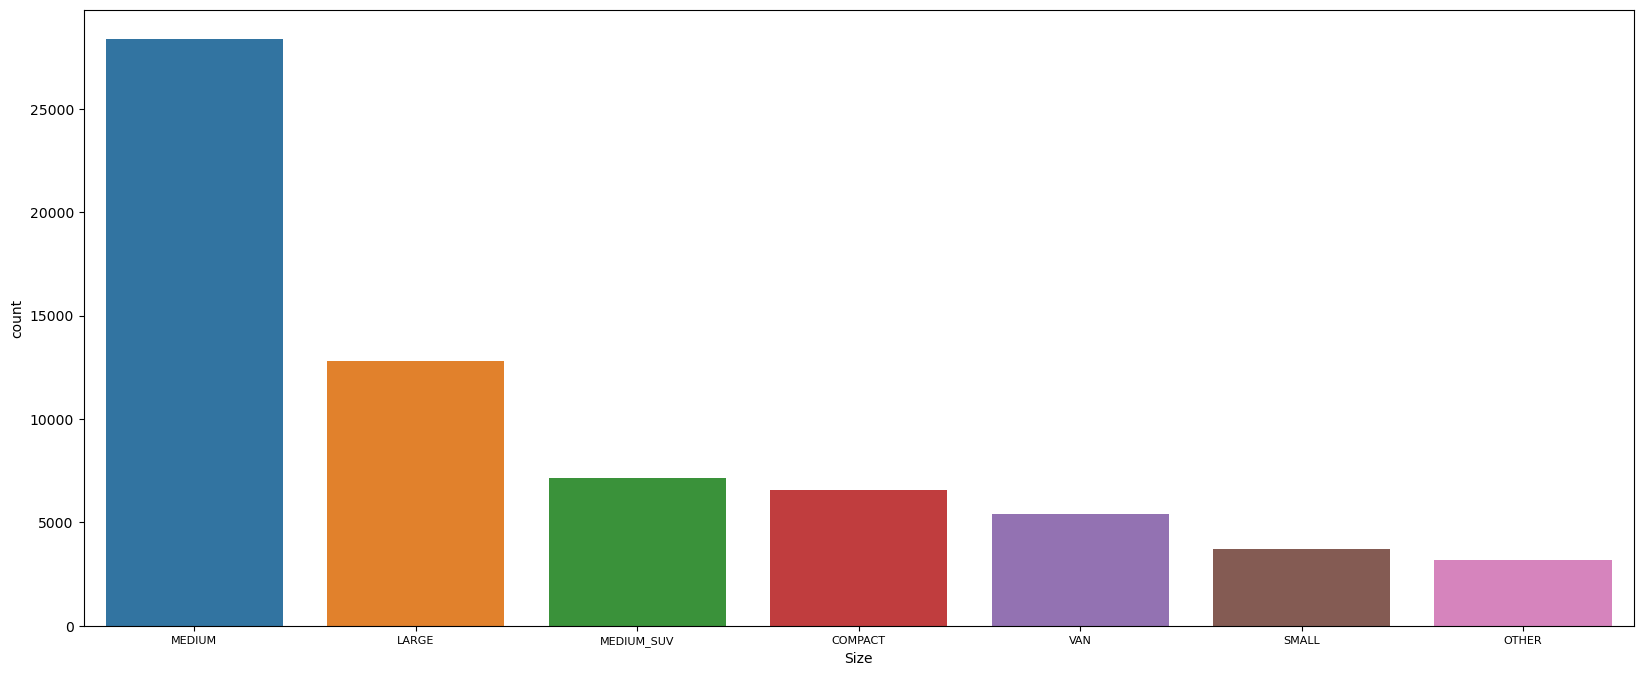

In [279]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "Size", data = car_kick)
plt.show()

In [280]:
cat_features.append('Size')

In [281]:
# TopThreeAmericanName -Whether the car is from one of the three largest manufacturers in America

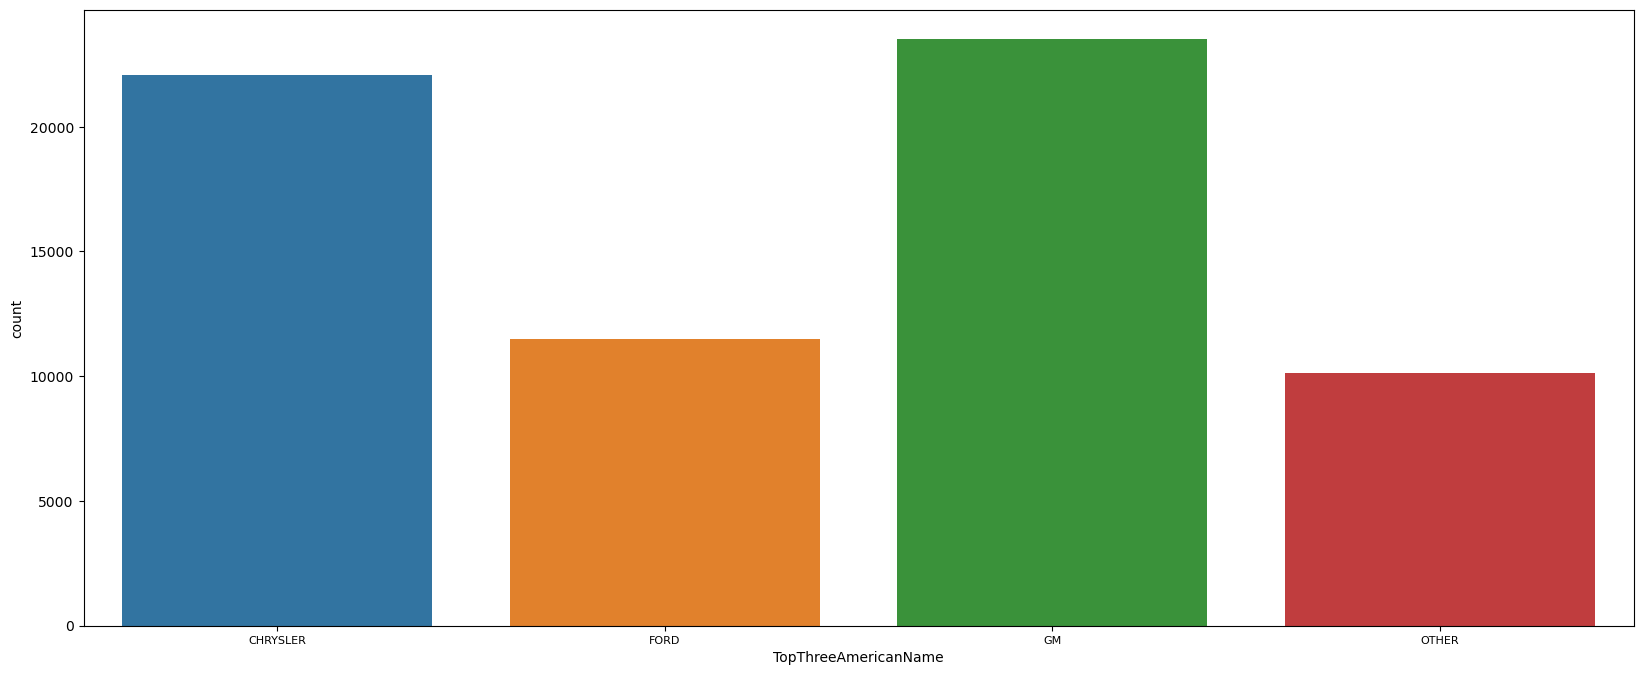

In [282]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "TopThreeAmericanName", data = car_kick)
plt.show()

In [283]:
cat_features.append('TopThreeAmericanName')

# BYRNO -Car registration number

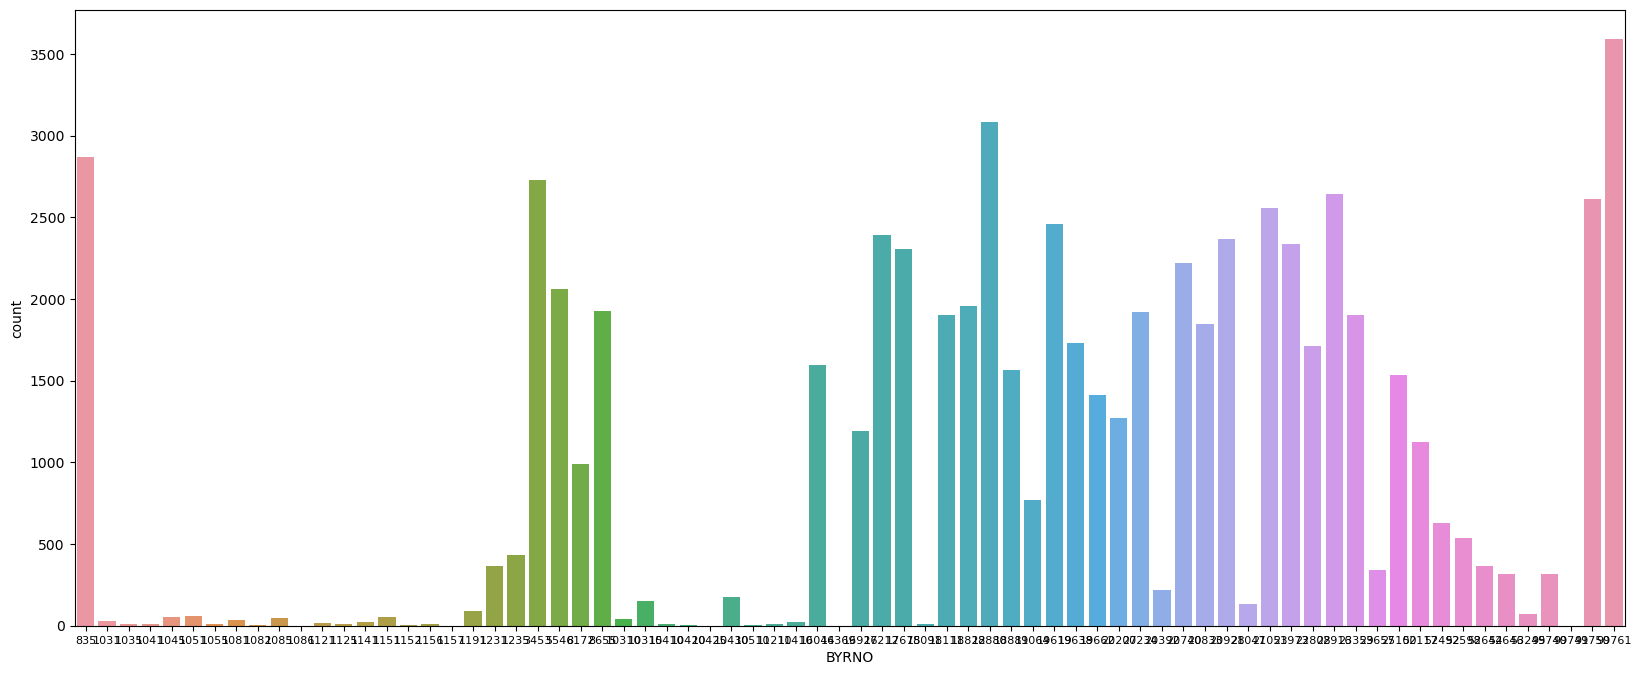

In [284]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "BYRNO", data = car_kick)
plt.show()

In [285]:
print("Counting of unique registration number")
print(car_kick['BYRNO'].value_counts())

Counting of unique registration number
99761    3591
18880    3082
835      2870
3453     2729
22916    2641
         ... 
1086        1
1157        1
10425       1
99741       1
16369       1
Name: BYRNO, Length: 72, dtype: int64


In [286]:
#There is a lot of diffrent models in the data, it would be good to split it into more general categories

other = car_kick['BYRNO'].value_counts()[40:].index.tolist()
car_kick['BYRNO'].replace(other, "OTHER", inplace = True)

In [287]:
cat_features.append('BYRNO')

# VNZIP1 - Car ZIP number

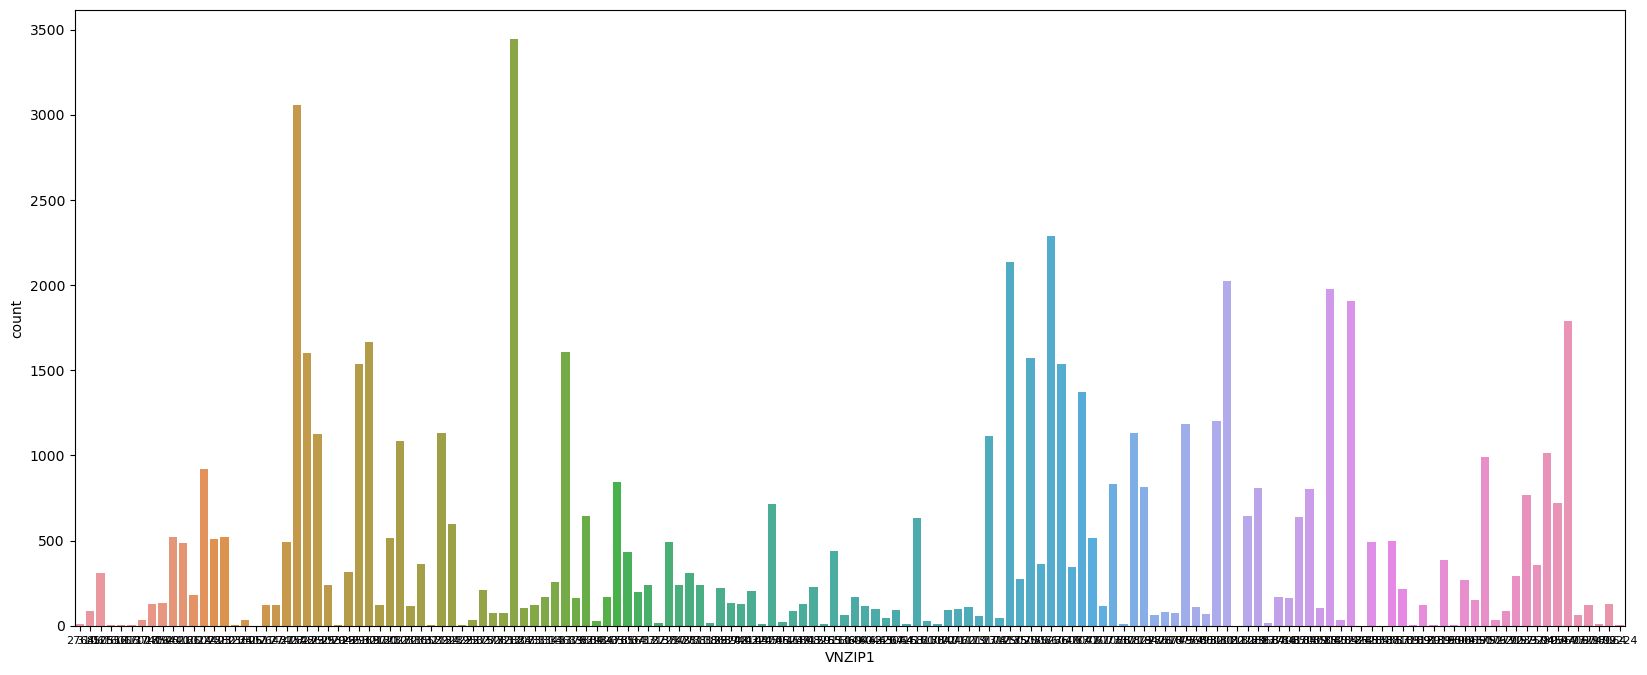

In [288]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "VNZIP1", data = car_kick)
plt.show()

In [289]:
print("Counting of unique ZIP number")
print(car_kick['VNZIP1'].value_counts()[30:])

Counting of unique ZIP number
92337    765
94544    722
45005    713
33809    644
80229    643
        ... 
16137      2
80112      1
25071      1
85248      1
85338      1
Name: VNZIP1, Length: 120, dtype: int64


In [290]:
car_kick['VNZIP1'] = car_kick['VNZIP1'].apply(lambda x: str(x)[:2])

In [291]:
#There is a lot of diffrent models in the data, it would be good to split it into more general categories

other = car_kick['VNZIP1'].value_counts()[40:].index.tolist()
car_kick['VNZIP1'].replace(other, "OTHER", inplace = True)

In [292]:
cat_features.append('VNZIP1')

# VNST - Car navigation system

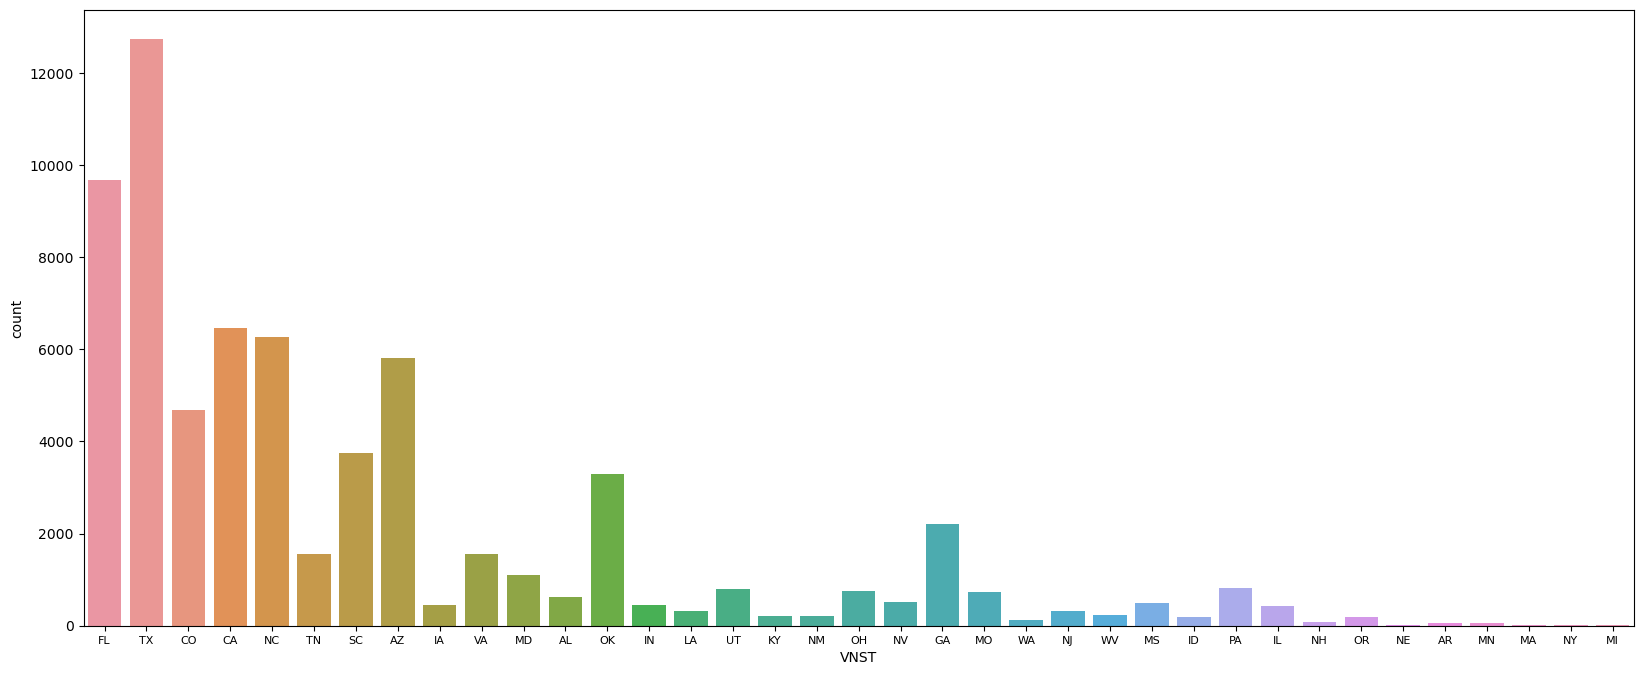

In [293]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "VNST", data = car_kick)
plt.show()

In [294]:
#There is a lot of diffrent models in the data, it would be good to split it into more general categories

other = car_kick['VNST'].value_counts()[10:].index.tolist()
car_kick['VNST'].replace(other, "OTHER", inplace = True)

In [295]:
cat_features.append('VNST')

# IsOnlineSale - Whether the sale was online or not

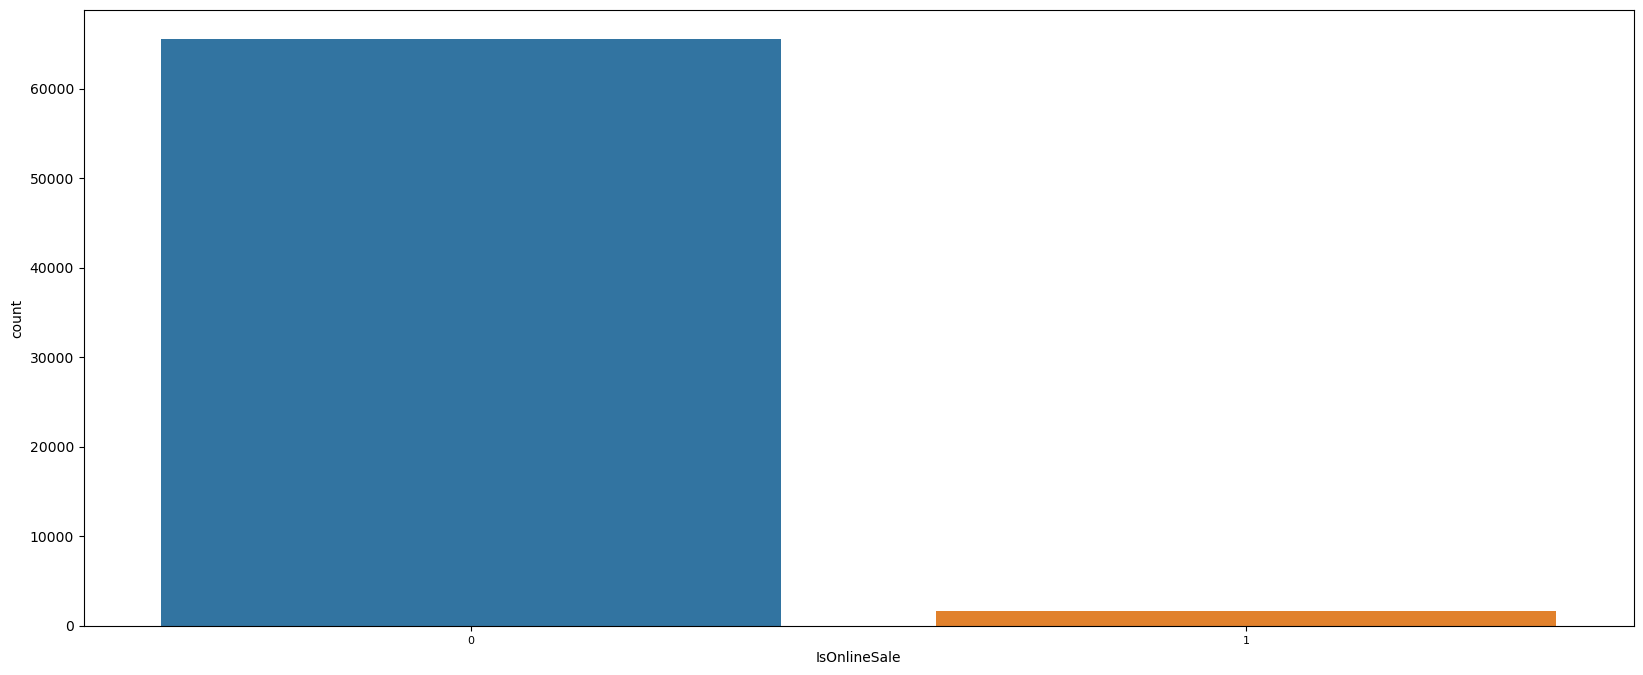

In [296]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x = "IsOnlineSale", data = car_kick)
plt.show()

In [297]:
cat_features.append('IsOnlineSale')

/var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/ipykernel_1081/3465076784.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlGn").copy()
  color.set_bad('lightblue')


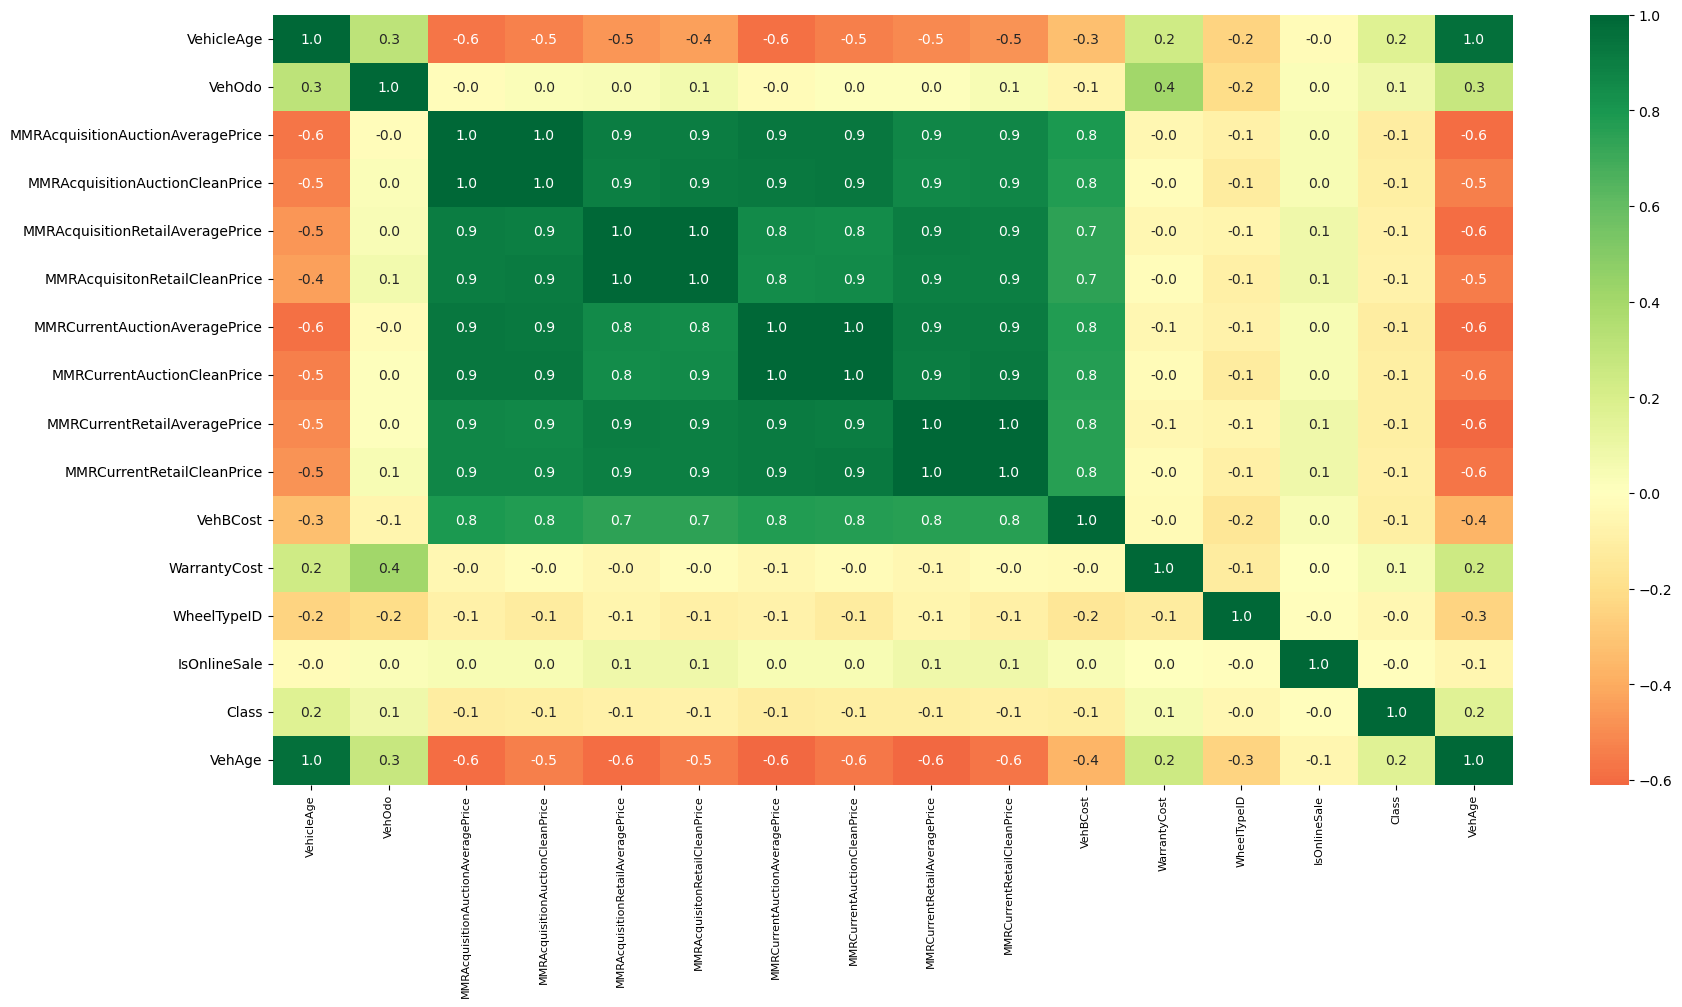

In [298]:
def plot_heat_map(dataframe):
    color = plt.get_cmap('RdYlGn')   # default color
    color.set_bad('lightblue')
    plt.subplots(figsize=(20, 10))
    sns.heatmap(dataframe.corr(),  annot=True, fmt='.1f', center=0, cmap=color)
    return plt.show()
plot_heat_map(car_kick)

In [299]:
print('Numerical variables: ', num_features)

Numerical variables:  ['VehAge', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 'VehBCost', 'WarrantyCost']


In [300]:
print('Categorical variables: ', cat_features)

Categorical variables:  ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale']


In [301]:
print(car_kick.corr().abs())

                                   VehicleAge    VehOdo  \
VehicleAge                           1.000000  0.307065   
VehOdo                               0.307065  1.000000   
MMRAcquisitionAuctionAveragePrice    0.577551  0.013847   
MMRAcquisitionAuctionCleanPrice      0.530308  0.027539   
MMRAcquisitionRetailAveragePrice     0.470060  0.036081   
MMRAcquisitonRetailCleanPrice        0.435900  0.068045   
MMRCurrentAuctionAveragePrice        0.588476  0.028840   
MMRCurrentAuctionCleanPrice          0.544866  0.012019   
MMRCurrentRetailAveragePrice         0.514644  0.017334   
MMRCurrentRetailCleanPrice           0.479823  0.050215   
VehBCost                             0.327180  0.063236   
WarrantyCost                         0.237107  0.406373   
WheelTypeID                          0.242197  0.205637   
IsOnlineSale                         0.026979  0.028611   
Class                                0.169450  0.088158   
VehAge                               0.957778  0.269816 

In [302]:

corr_matrix = car_kick.corr().abs()
np.triu(np.ones(corr_matrix.shape), k=1)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

/var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/ipykernel_1081/3465076784.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlGn").copy()
  color.set_bad('lightblue')


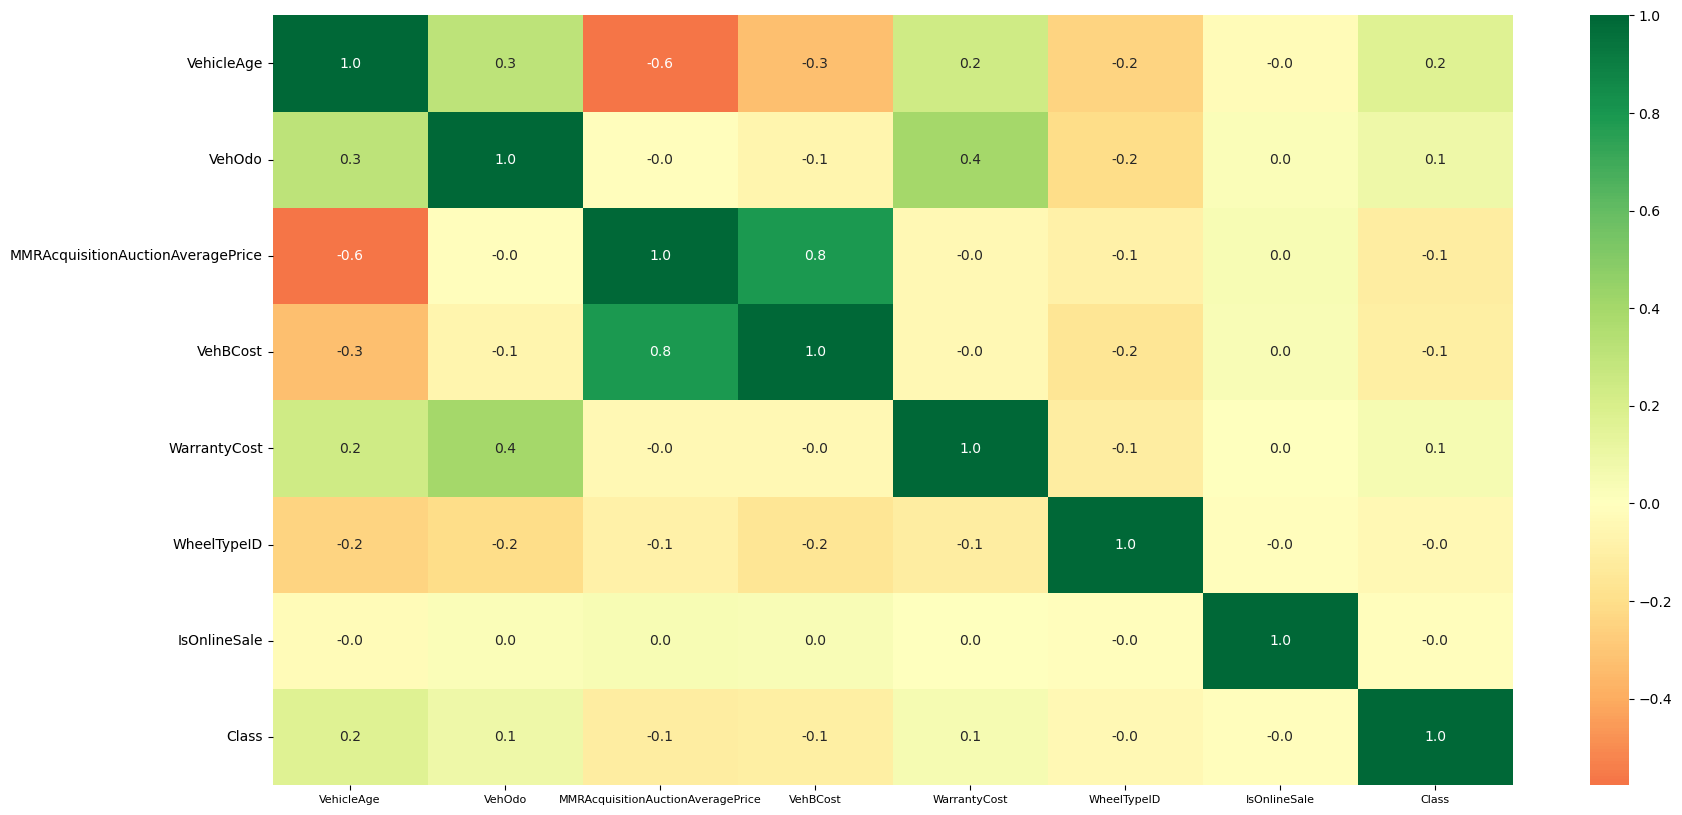

In [303]:
# Delete high correlated columns
corr_matrix = car_kick.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 
new_car_kick = car_kick.drop(to_drop, axis=1)

plot_heat_map(new_car_kick)

In [304]:
X  = new_car_kick.iloc[:,:-1]
y = new_car_kick.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state,shuffle=True,stratify=y)
print("Count train data:",X_train.shape, y_train.shape)
print("Count test data:",X_test.shape, y_test.shape)

Count train data: (40326, 21) (40326,)
Count test data: (26885, 21) (26885,)


In [305]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [306]:
num_features = list(set(num_features) - set(to_drop))

In [307]:
encoder = OneHotEncoder()
encoder_cols_train = encoder.fit_transform(X_train[cat_features].astype(str))
encoder_cols_test = encoder.transform(X_test[cat_features].astype(str))

In [308]:
# Add one-hot encoded columns to numerical features
X_train = pd.concat([X_train[num_features], encoder_cols_train], axis=1)
X_train_cols = X_train.columns
X_test = pd.concat([X_test[num_features], encoder_cols_test], axis=1)

In [309]:
print(X_train.shape)
print(X_test.shape) 

(40326, 164)
(26885, 164)


In [310]:
#Data modelling

In [311]:
xgb_model = xgb.XGBClassifier(random_state = random_state, eval_metric = "mlogloss", use_label_encoder=False)
xgb_model.fit(X_train, y_train)
plt.rcParams["figure.figsize"] = (14, 7)
drop_col_index = []
display_col_name = []
display_col_value = []
thr = np.median(xgb_model.feature_importances_)
thr = 0.0091
print(f"Threshold for feature importance = {thr}")
cnt = len(xgb_model.feature_importances_)
for i, feature in enumerate(xgb_model.feature_importances_):
    if feature < thr:
        drop_col_index.append(i)
    else:
        display_col_name.append(i)
        display_col_value.append(feature)
        
drop_col_idx = drop_col_index

X_train=X_train.drop(X_train.columns[drop_col_idx], axis=1)
X_test=X_test.drop(X_test.columns[drop_col_idx], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Threshold for feature importance = 0.0091


In [312]:
print(X_train.shape)
print(X_test.shape)

(40326, 12)
(26885, 12)


In [313]:
# jest 14 ficzerów w smote jest do 15 max potem sie wykrzacza blad albo trzeba brac inna libke 
# https://stackoverflow.com/questions/72297968/attributeerror-nonetype-object-has-no-attribute-split-smote
len(list(zip(display_col_name,display_col_value)))

12

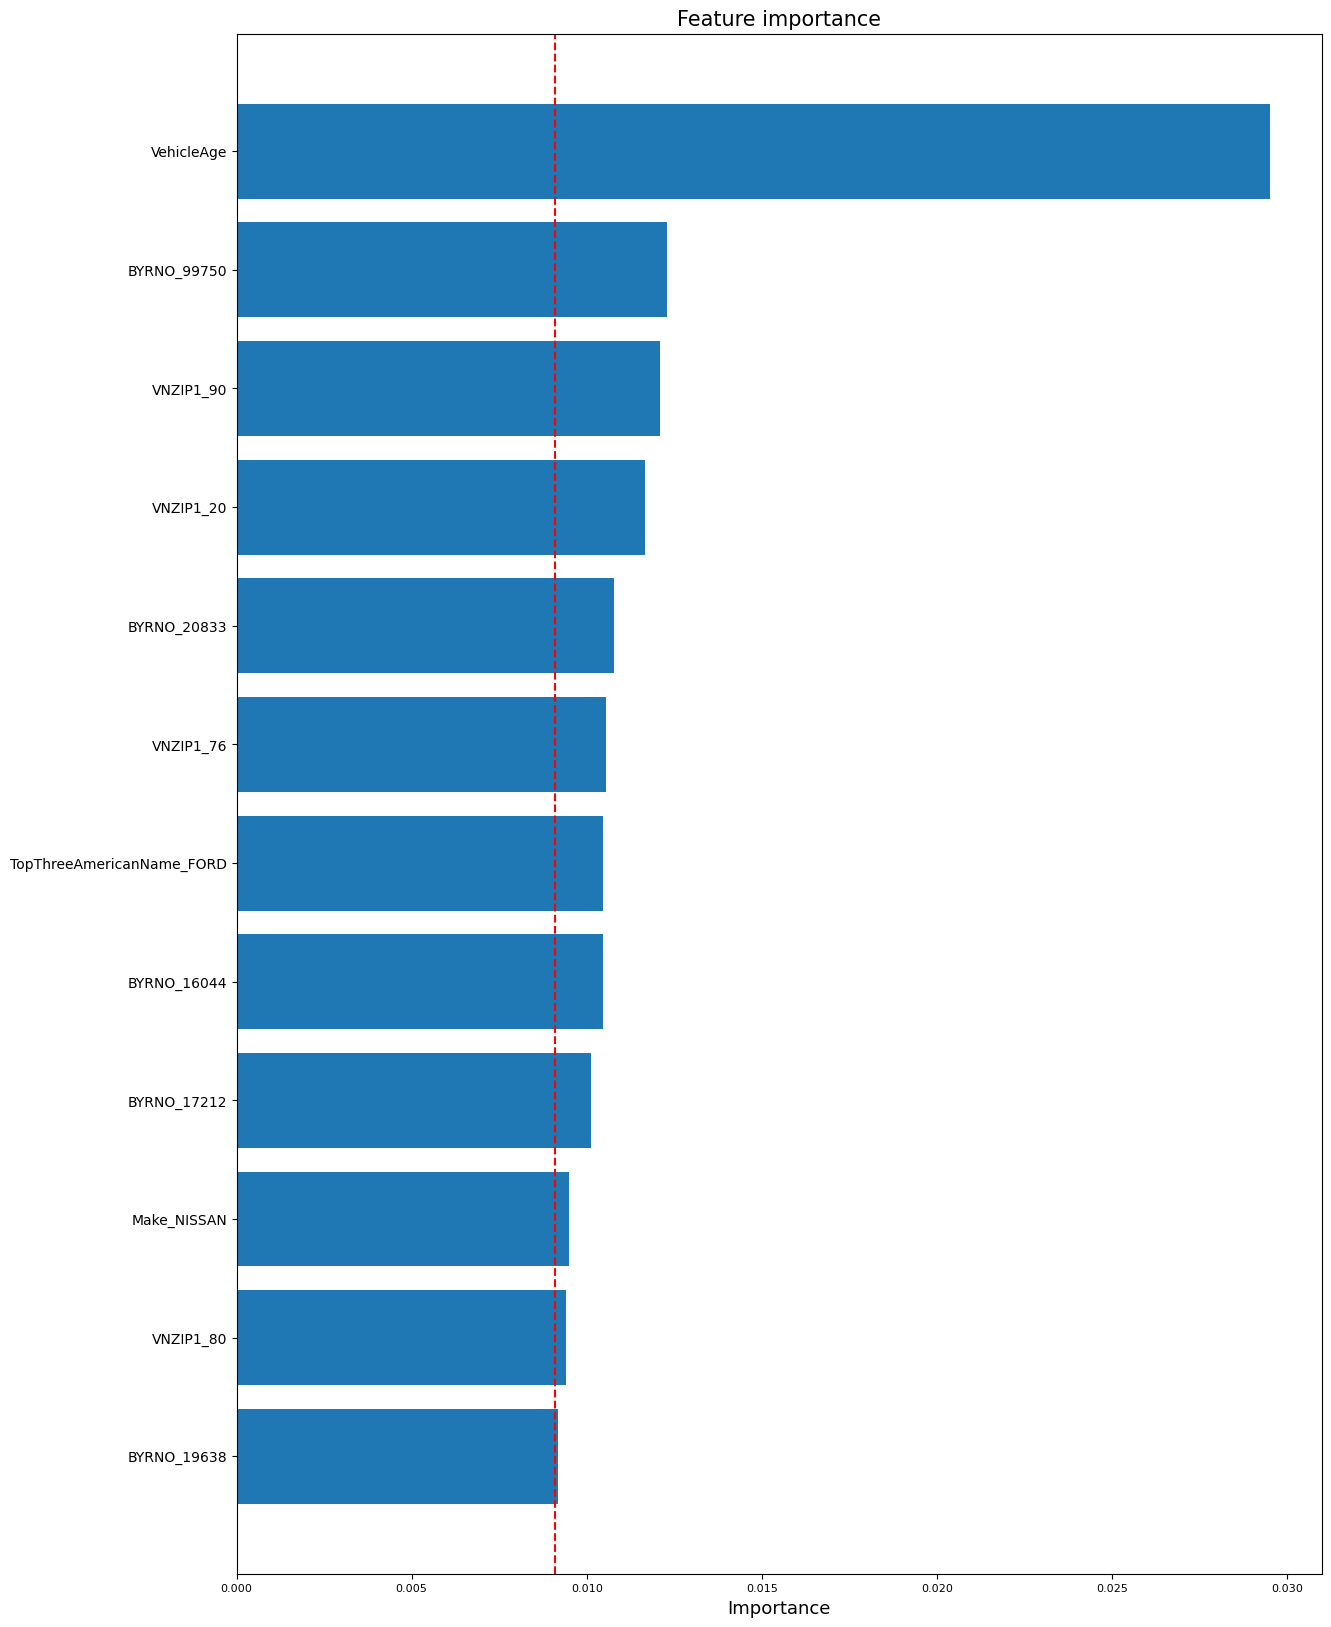

In [314]:
plt.rcParams["figure.figsize"] = (14, 20)
list_name = []
for num,col in enumerate(X_train_cols):
    if num in display_col_name:
        list_name.append(col)
sorted_list=list(zip(list_name, display_col_value))
sorted_list.sort(key=lambda y: y[1])

features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)
plt.barh(importance_sorted, features_sorted)
plt.axvline(x=thr, color='r', linestyle='--');

In [315]:
X_train.shape, y_train.shape

((40326, 12), (40326,))

(72952, 12) (72952,)


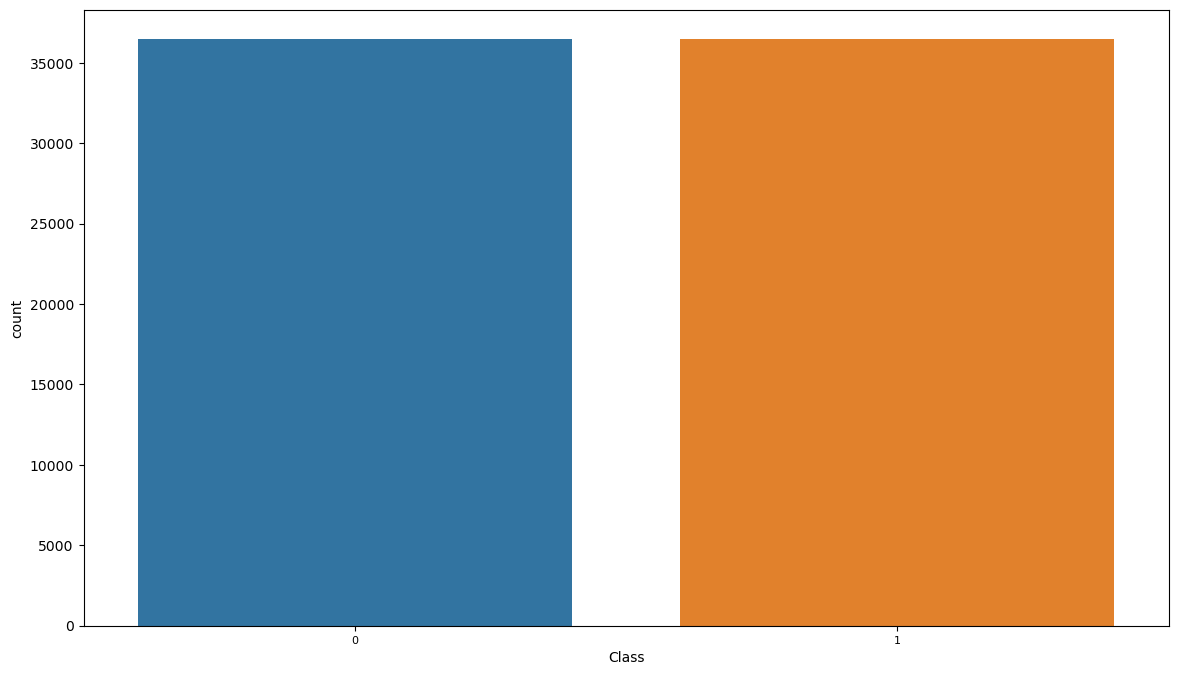

In [316]:
plt.rcParams["figure.figsize"] = (14, 8)
smote = SMOTE(random_state=random_state)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape,y_train.shape)
full = X_train.copy()
full["Class"] = y_train
sns.countplot(x ='Class', data = full);

In [344]:
def CVmodel(nFolds = 5, randomState=2020, features=pd.concat([X_train, y_train], axis=1).columns.tolist().remove(target), lin_reg = False, lin_reg_without_fi = False,
            cutoff=0.5, debug= False, model = RandomForestClassifier(), df = pd.concat([X_train, y_train], axis=1), pipeline = False):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    # predictions for individual folds
    predictions = []

    # the index in the original file
    indices = []
    true=[]
    
    if lin_reg:
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])
            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            # preds = model.predict_proba(df.iloc[test][features])[:,1]
            preds, y_test = model.predict(df.iloc[test][features], round(cutoff,1))
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
            true = (df.iloc[test][target]==1)
            if(lin_reg_without_fi == False):
                feature_importance = model.coef_
        if(lin_reg_without_fi):
            return predictions, indices, true
        return predictions, indices, feature_importance, true
        
        
    if(pipeline):
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])
            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            preds = model.predict_proba(df.iloc[test][features])[:,1]
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
        return predictions, indices, true
        
    for train, test in kf.split(df.index.values):
        if debug:
            print(model)
        model.fit(df.iloc[train][features], df.iloc[train][target])
        # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
        preds = model.predict_proba(df.iloc[test][features])[:,1]
        # information about predictions for this fold
        predictions.append(preds.tolist().copy())
        # indexed in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())
        true.append(df.iloc[test][target]==1)
        feature_importance = model.feature_importances_
        
    return predictions, indices, feature_importance, true

In [ ]:
# Define the models to be tested
models = [
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [2, 4, 6, 8, 10],
            'classifier__min_samples_split': [2, 4, 6, 8, 10],
            'classifier__min_samples_leaf': [1, 2, 4, 6, 8, 10]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [10, 50, 100, 200],
            'classifier__max_depth': [2, 4, 6, 8, 10],
            'classifier__min_samples_split': [2, 4, 6, 8, 10],
            'classifier__min_samples_leaf': [1, 2, 4, 6, 8, 10]
        }
    },
    {
        'name': 'Neural Network',
        'model': MLPClassifier(),
        'params': {
            'classifier__hidden_layer_sizes': [(16,), (32,), (64,), (128,)],
            'classifier__activation': ['relu', 'tanh', 'logistic'],
            'classifier__solver': ['sgd', 'adam'],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1]
        }
    }
]


In [355]:
results = []
# Define the cross-validation pipeline for each model
for model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model['model'])
    ])
    #print(pipeline.get_params().keys())
    
    # Use GridSearchCV to perform hyperparameter tuning
    grid_search = RandomizedSearchCV(pipeline, model['params'], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results.append({
            'Model': model['name'],
            'Best parameters': grid_search.best_params_,
            'Best score': grid_search.best_score_
            })
    
df_result = pd.DataFrame(results)

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_cc17df0d8f9a4fd1af79fac29ef3a7ef/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_cc17df0d8f9a4fd1af79fac29ef3a7ef/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_cc17df0d8f9a4fd1af79fac29ef3a7ef/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_bf099e05edab458e86db17a1ddc53c8a/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_bf099e05edab458e86db17a1ddc53c8a/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_bf099e05edab458e86db17a1ddc53c8a/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_231756789888417a86f38ff63d73b5bd/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_231756789888417a86f38ff63d73b5bd/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_231756789888417a86f38ff63d73b5bd/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] loaded from the file /var/folders/gd/kyzdlh5x2bj6z9mv_q_r_mx40000gn/T/joblib_memmapping_folder_1081_2984ba93b9724508b9b5276ef8851c30_231756789888417a86f38ff63d73b5bd/1081-140395155538896-8990a6533db94f02a7a255057c48da5f.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0

In [356]:
df_result

,Model,Best parameters,Best score
0,Decision Tree,"{'classifier__min_samples_split': 4, 'classifi...",0.629332
1,Random Forest,"{'classifier__n_estimators': 200, 'classifier_...",0.631826
2,Neural Network,"{'classifier__solver': 'adam', 'classifier__le...",0.627138


In [357]:
def plotROCs(results, saving = False):
    # Determining the size of the drawing
    fig, ax = plt.subplots(figsize=(10,9))
    ax.set_facecolor((0,0,0.1))
    
        
    for true, pred, label in results:
        
        # Calculation of the points needed to draw the ROC curve
        # the roc_curve function concludes three data series, fpr, 
        #tpr, and cutoff levels
        fpr, tpr, thresholds = roc_curve(true, pred)
        
        # We calculate the area under the curve
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
        
        # curve thickness
        lw = 2

        # We draw the ROC curve
        ax.plot(fpr, tpr, lw=lw, label=f'{label}: {rocScore}')
  
    # We draw a 45 degree curve as a reference point
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    # We add light margins to the range so that the curve 
    #does not coincide with the axes
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")
    if saving:
        plt.savefig('images/ROC.png')
    plt.show()

In [203]:
#grid_search.cv_results_
df_result = df_result.sort_values(by=['Best score'],ascending=False)
df_result.head()

,Model,Best parameters,Best score
2,Neural Network,"{'classifier__solver': 'sgd', 'classifier__lea...",0.632128
1,Random Forest,"{'classifier__n_estimators': 10, 'classifier__...",0.631758
0,Decision Tree,"{'classifier__min_samples_split': 8, 'classifi...",0.629071


In [358]:

df_result = df_result.sort_values(by=['Best score'],ascending=False)
df_result.head()

,Model,Best parameters,Best score
1,Random Forest,"{'classifier__n_estimators': 200, 'classifier_...",0.631826
0,Decision Tree,"{'classifier__min_samples_split': 4, 'classifi...",0.629332
2,Neural Network,"{'classifier__solver': 'adam', 'classifier__le...",0.627138


In [359]:
df_result.iloc[0,1]

{'classifier__n_estimators': 200,
 'classifier__min_samples_split': 6,
 'classifier__min_samples_leaf': 2,
 'classifier__max_depth': 10}

In [377]:
import re
for index, row in df_result.iterrows():
    print(row["Best parameters"])
    params_str = "("
    for key, value in row["Best parameters"].items():
        param_name = key.split("__")[1]  # extract the parameter name from the dictionary key
        if isinstance(value, str):
            param_value = f"'{value}'"  # wrap string values in quotes
        else:
            param_value = str(value)
        params_str += f"{param_name}={param_value}, "

    params_str = params_str[:-2]  # remove the final comma and space
    params_str += ")"
    print(params_str)
    print(str(models[index]['model'])[:-2]+params_str)

{'classifier__n_estimators': 200, 'classifier__min_samples_split': 6, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}
(n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_depth=10)
RandomForestClassifier((n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_depth=10)
{'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}
(min_samples_split=4, min_samples_leaf=2, max_depth=10)
DecisionTreeClassifier((min_samples_split=4, min_samples_leaf=2, max_depth=10)
{'classifier__solver': 'adam', 'classifier__learning_rate_init': 0.01, 'classifier__hidden_layer_sizes': (64,), 'classifier__activation': 'tanh'}
(solver='adam', learning_rate_init=0.01, hidden_layer_sizes=(64,), activation='tanh')
MLPClassifier((solver='adam', learning_rate_init=0.01, hidden_layer_sizes=(64,), activation='tanh')


In [382]:
for index, row in df_result.iterrows():
    print(models[index]['model'])
    params_str = "("
    for key, value in row["Best parameters"].items():
        param_name = key.split("__")[1]  # extract the parameter name from the dictionary key
        if isinstance(value, str):
            param_value = f"'{value}'"  # wrap string values in quotes
        else:
            param_value = str(value)
        params_str += f"{param_name}={param_value}, "

    params_str = params_str[:-2]  # remove the final comma and space
    params_str += ")"
    
    #Standardization of data and KNN model 
    model = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    (str(models[index]['model']),  eval(str(models[index]['model'])[:-2]+params_str))
                    ])
    
    #GridSearch(param=param, estimator=pipe)
    predictions, indices, true = CVmodel(model=model, pipeline=True)
    feature_importance = pipeline.steps[1][1].coef_[0]
        
    model_save = {
        "name": row["Model"],
        "predictions": predictions,
        "indices": indices,
        "feature importance": feature_importance,
        "true" : true
    }
    # open the file for binary writing using "with"
    with open("models_results/{}.p".format(row["Model"]), "wb") as fp:
        pickle.dump(model_save, fp)

RandomForestClassifier()


KeyError: None

In [ ]:
listOfResults = []
true = (new_car_kick[target]==1)

for filename in os.listdir("models_results"):
    if filename.endswith(".p"):
        with open(os.path.join("models_results", filename), "rb") as fp:
            model = pickle.load(fp)
        pred = pd.Series(sum(model["predictions"], []), 
                         index=sum(model["indices"], [])).sort_index()
        listOfResults.append((true, pred, model["name"]))

plotROCs(listOfResults, saving=True)

In [205]:
print("The best model is " + df_result.iloc[0][0])
best_params = sorted(results, key=lambda k: k['Best score'], reverse=True)[0]["Best parameters"]
print("Parameters:", best_params)
for model in models:
    if str(model["name"]) == str(df_result.iloc[0][0]):
        #print(model["model"].get_params())
        #print(pipeline.get_params().keys())
        
        pipe_finall = Pipeline(steps = [
            ('scaler', StandardScaler()),
            ('classifier', model["model"])
            ])
        

The best model is Neural Network
Parameters: {'classifier__solver': 'sgd', 'classifier__learning_rate_init': 0.01, 'classifier__hidden_layer_sizes': (16,), 'classifier__activation': 'tanh'}


In [206]:
pipe_finall.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', MLPClassifier())])

In [207]:
y_pred = pipe_finall.predict(X_test)
y_pred_proba = pipe_finall.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     24319
           1       0.15      0.62      0.24      2566

    accuracy                           0.62     26885
   macro avg       0.54      0.62      0.49     26885
weighted avg       0.86      0.62      0.70     26885



In [212]:
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("Recall = ",recall_score(y_test, y_pred))
print("Precision = ",precision_score(y_test, y_pred))
print("F1 = ",f1_score(y_test, y_pred))

Accuracy =  0.6184861446903478
Recall =  0.6184723304754481
Precision =  0.14606534744592728
F1 =  0.23631896359169083


AxesSubplot(0.125,0.11;0.62x0.77)


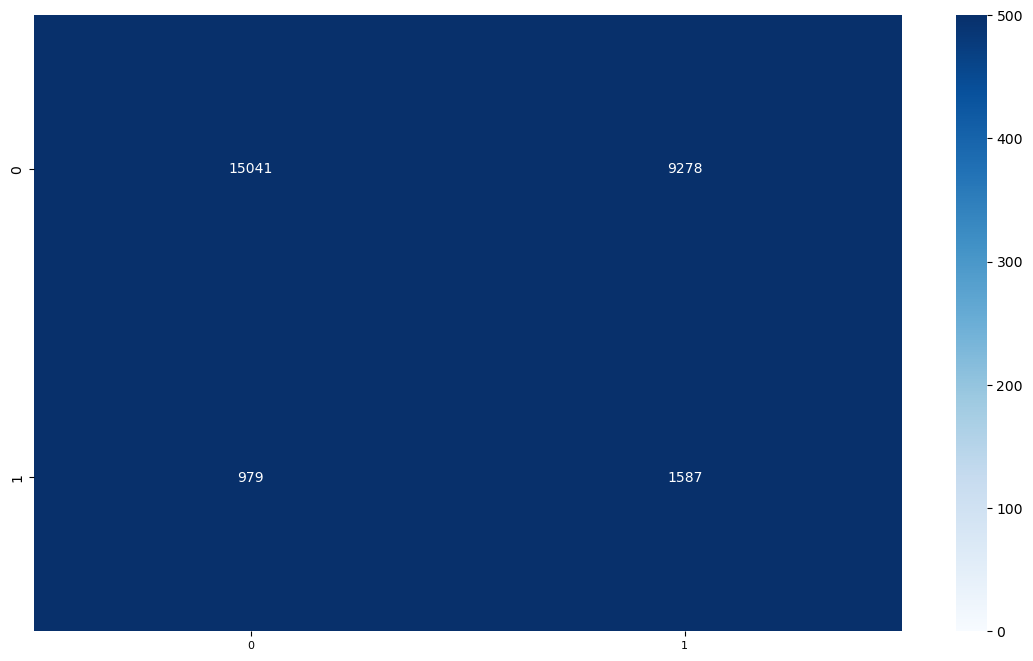

In [216]:
print(sns.heatmap(confusion_matrix(y_test,y_pred),vmin=0,vmax=500,annot=True,cmap='Blues',fmt='g'));

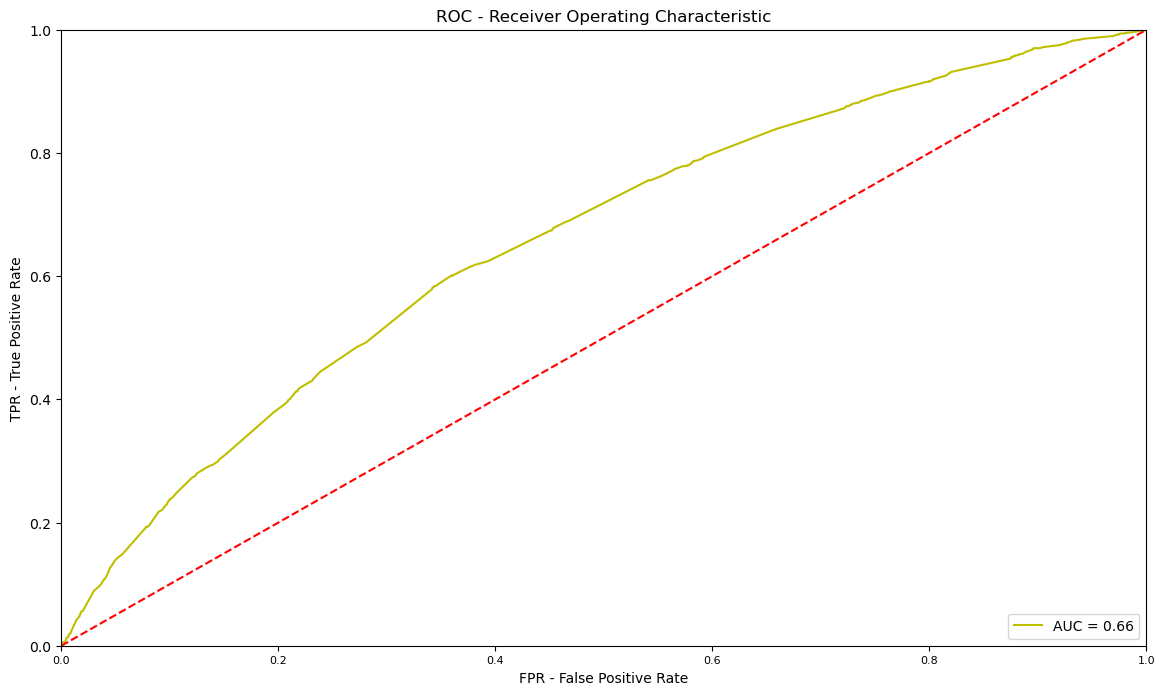

In [217]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.title('ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR - True Positive Rate')
plt.xlabel('FPR - False Positive Rate')
plt.show()